Neste projeto foram resolvidos problemas de distribuição de frequência do livro "Introdução à Estatística", 12ª edição, do autor Mario F. Triola.

## Importação das bibliotecas necessárias

In [2]:
#Importanto as bibliotecas necessárias, temos:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Problema 19 - Análise dos Últimos Dígitos


As alturas de estudantes de estatística foram obtidas pelo autor como parte de um experimento realizado em classe. Os últimos dígitos dessas alturas estão listados a seguir. Construa uma distribuição de frequência com 10 classes. Com base na distribuição, as alturas parecem ter sido relatadas ou realmente medidas? O que você sabe sobre a precisão dos resultados?

In [ ]:
#Criando um Series com os dados fornecidos no problema e salvando em uma planilha de Excel, temos:
string = '0 0 0 0 0 0 0 0 0 1 1 2 3 3 3 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 8 8 8'
dados_string = string.split(' ')
dados_numericos = []
for i in dados_string:
  dados_numericos.append(int(i))
dados_numericos = pd.DataFrame({'Digito final de alturas':dados_numericos})
dados_numericos.to_csv('digito_final_alturas.csv')

In [ ]:
#abrindo os dados .csv, temos:
base_dados = pd.read_csv('digito_final_alturas.csv')
base_dados.drop('Unnamed: 0', axis = 'columns', inplace = True)
base_dados.head(10)

,Digito final de alturas
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


O problema informa que devemos criar uma distribuição de frequências com 10 classes. Para criar uma distribuição de frequência para variáveis quanntitativas com classes de amplitude fixa podemos usar o seguinte método:

pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

onde:

x = array a ser segmentado

bins = pode ser numero inteiro (numero de classes de amplitude igual no intervalo de x); pode ser uma sequencia de escalares (definindo os limites inferiores e superiores de cada classe, admitindo tamanhos de classe não uniformes); e pode ser um lista contendo os segmentos exatos a serem usados.

labels = Especifica os rótulos para os compartimentos retornados. Deve ter o mesmo comprimento dos compartimentos resultantes.

include_lowest = Se o primeiro intervalo deve ser inclusivo à esquerda ou não.

In [ ]:
#Criando uma Series contendo as frequências de cada classe, temos:
numero_classes = 10
frequencia = pd.value_counts(pd.cut(x = base_dados['Digito final de alturas'], bins = numero_classes, include_lowest = True),
                             sort = False)
frequencia

(-0.009000000000000001, 0.8]     9
(0.8, 1.6]                       2
(1.6, 2.4]                       1
(2.4, 3.2]                       3
(3.2, 4.0]                       1
(4.0, 4.8]                       0
(4.8, 5.6]                      15
(5.6, 6.4]                       2
(6.4, 7.2]                       0
(7.2, 8.0]                       3
Name: Digito final de alturas, dtype: int64

In [ ]:
#Criando uma Series contendo as frequências relativas de cada classe, temos:
percentual = pd.value_counts(pd.cut(x = base_dados['Digito final de alturas'], bins = numero_classes, include_lowest = True), 
                             sort = False, normalize = True)*100
percentual

(-0.009000000000000001, 0.8]    25.000000
(0.8, 1.6]                       5.555556
(1.6, 2.4]                       2.777778
(2.4, 3.2]                       8.333333
(3.2, 4.0]                       2.777778
(4.0, 4.8]                       0.000000
(4.8, 5.6]                      41.666667
(5.6, 6.4]                       5.555556
(6.4, 7.2]                       0.000000
(7.2, 8.0]                       8.333333
Name: Digito final de alturas, dtype: float64

In [ ]:
#Criando a tabela de distribuição de frequência, temos:
dist_freq = pd.DataFrame({'Frequencia':frequencia,'Porcentagem (%)':percentual})
dist_freq

,Frequencia,Porcentagem (%)
"(-0.009000000000000001, 0.8]",9,25.000000
"(0.8, 1.6]",2,5.555556
"(1.6, 2.4]",1,2.777778
"(2.4, 3.2]",3,8.333333
"(3.2, 4.0]",1,2.777778
"(4.0, 4.8]",0,0.000000
"(4.8, 5.6]",15,41.666667
"(5.6, 6.4]",2,5.555556
"(6.4, 7.2]",0,0.000000
"(7.2, 8.0]",3,8.333333


In [ ]:
dist_freq.rename_axis('Classes', axis = 'columns', inplace = True)
dist_freq

Classes,Frequencia,Porcentagem (%)
"(-0.009000000000000001, 0.8]",9,25.000000
"(0.8, 1.6]",2,5.555556
"(1.6, 2.4]",1,2.777778
"(2.4, 3.2]",3,8.333333
"(3.2, 4.0]",1,2.777778
"(4.0, 4.8]",0,0.000000
"(4.8, 5.6]",15,41.666667
"(5.6, 6.4]",2,5.555556
"(6.4, 7.2]",0,0.000000
"(7.2, 8.0]",3,8.333333


**Conclusões**

A partir da tabela de distribuição de frequência, podemos concluir que os dados, possivelmente, foram coletados a partir de entrevistas onde os indivíduos informaram suas alturas, ou seja, os dados não foram medidos pelos entrevistadores. Se os dados de altura fossem medidos, os dados apresentariam uma distribuição do dígito final mais uniforme.

## Problema 20 - Análise dos Últimos Dígitos 


Pesos de respondentes foram registrados como parte de California Health Interview
Survey. Os últimos dígitos dos pesos de 50 respondentes selecionados aleatoriamente estão listados a seguir. Construa
uma distribuição de frequência com 10 classes. Com base na distribuição, as alturas parecem ter sido relatadas ou
realmente medidas? O que você sabe sobre a precisão dos resultados?


In [ ]:
#Criando um Series com os dados fornecidos no problema e salvando em uma planilha de Excel, temos:
string = '5 0 1 0 2 0 5 0 5 0 3 8 5 0 5 0 5 6 0 0 0 0 0 0 8 5 5 0 4 5 0 0 4 0 0 0 0 0 8 0 9 5 3 0 5 0 0 0 5 8'
dados_string = string.split(' ')
dados_numericos = []
for i in dados_string:
  dados_numericos.append(int(i))
dados_numericos = pd.DataFrame({'Ultimo digito':dados_numericos})
dados_numericos.to_csv('ultimo_digito_peso.csv')

In [ ]:
#abrindo os dados .csv, temos:
base_dados = pd.read_csv('ultimo_digito_peso.csv')
base_dados.drop('Unnamed: 0', axis = 'columns', inplace = True)
base_dados.head()

,Ultimo digito
0,5
1,0
2,1
3,0
4,2


In [ ]:
#segmentando os dados quantitativos em 10 classes de amplitude fixa, temos:
numero_classes = 10
dados_segmentados = pd.cut(x = base_dados['Ultimo digito'], bins = numero_classes, include_lowest = True)
frequencia = pd.value_counts(dados_segmentados, sort = False)
frequencia

(-0.009999999999999998, 0.9]    26
(0.9, 1.8]                       1
(1.8, 2.7]                       1
(2.7, 3.6]                       2
(3.6, 4.5]                       2
(4.5, 5.4]                      12
(5.4, 6.3]                       1
(6.3, 7.2]                       0
(7.2, 8.1]                       4
(8.1, 9.0]                       1
Name: Ultimo digito, dtype: int64

In [ ]:
#segmentando os dados em classes de amplitude fixa e fornecendo frquências relativas, temos:
percentual = pd.value_counts(pd.cut(x = base_dados['Ultimo digito'], bins = numero_classes, include_lowest = True),
                             sort = False, normalize = True)*100
percentual

(-0.009999999999999998, 0.9]    52.0
(0.9, 1.8]                       2.0
(1.8, 2.7]                       2.0
(2.7, 3.6]                       4.0
(3.6, 4.5]                       4.0
(4.5, 5.4]                      24.0
(5.4, 6.3]                       2.0
(6.3, 7.2]                       0.0
(7.2, 8.1]                       8.0
(8.1, 9.0]                       2.0
Name: Ultimo digito, dtype: float64

In [ ]:
#Criando tabela de distribuição de frequência e distribuição de frequência relativa, temos:
dist_freq = pd.DataFrame({'Frequência':frequencia,'Porcentagem(%)':percentual})
dist_freq.rename_axis('Classes', axis = 'index', inplace = True)
dist_freq

,Frequência,Porcentagem(%)
Classes,,
"(-0.009999999999999998, 0.9]",26,52.0
"(0.9, 1.8]",1,2.0
"(1.8, 2.7]",1,2.0
"(2.7, 3.6]",2,4.0
"(3.6, 4.5]",2,4.0
"(4.5, 5.4]",12,24.0
"(5.4, 6.3]",1,2.0
"(6.3, 7.2]",0,0.0
"(7.2, 8.1]",4,8.0


**Conclusão**

A partir da distribuição de frequência, podemos concluir que os dados são, possivelmente, oriundos de uma coleta na qual os entrevistados relataram as medidas de peso. Os dados de dígito final coletados de uma amostra aleatória simples apresentam uma distribuição mais uniforme dos dígitos finais. Portanto, os dados obtidos podem não ser representativos dessa população, dependendo dos desvios dos dados reais (que seriam obtidos a partir de uma medição utilizando-se uma balança no momento da coleta).

## Problema 21 - Taxas de Pulsação de Homens

Consulte o Conjunto de Dados 1 no Apêndice B e use as taxas de pulsação
(batimentos por minuto) de homens. Comece com um limite inferior de classe de 40 e use uma amplitude de classe de 10.
As taxas de pulsação de homens parecem ter uma distribuição normal?

In [ ]:
#Abrindo os dados, temos:
base_dados = pd.read_csv('MBODY.csv')
base_dados.head()

,AGE,PULSE,SYS,DIAS,HDL,LDL,WHITE,RED,PLATE,WT,HT,WAIST,ARMC,BMI
0,18,60,132,68,44,213,8.7,4.91,409,64.4,178.8,81.4,28.4,20.14
1,20,74,120,68,41,88,5.9,5.59,187,61.8,177.5,74.8,26.8,19.62
2,43,86,106,84,71,174,7.3,4.44,250,78.5,187.8,84.1,32.3,22.26
3,39,54,104,60,41,121,6.2,4.80,273,86.3,172.4,95.5,39.0,29.04
4,60,90,122,80,57,124,5.9,5.17,278,73.1,181.7,90.1,29.4,22.14


Primeiramente analisamos as informações contidas no dataset

In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     40 non-null     int64  
 1   PULSE   40 non-null     int64  
 2   SYS     40 non-null     int64  
 3   DIAS    40 non-null     int64  
 4   HDL     40 non-null     int64  
 5   LDL     40 non-null     int64  
 6   WHITE   40 non-null     float64
 7   RED     40 non-null     float64
 8   PLATE   40 non-null     int64  
 9   WT      40 non-null     float64
 10  HT      40 non-null     float64
 11  WAIST   40 non-null     float64
 12  ARMC    40 non-null     float64
 13  BMI     40 non-null     float64
dtypes: float64(7), int64(7)
memory usage: 4.5 KB


In [ ]:
#renomeando as colunas, temos:
colunas = {'AGE':'Idade (anos)',
           'PULSE':'Batimentos (bpm)',
           'SYS':'PSist (mmHg)',
           'DIAS':'PDiast (mmHg)',
           'HDL':'Colesterol HDL (mg/dL)',
           'LDL':'Colesterol LDL (mg/dL)',
           'WHITE':'Células brancas sangue (1.000 cel/μL)',
           'RED':'Células vermelhas sangue (1.000 cel/μL)',
           'PLATE':'Plaquetas (1.000 cel/μL)',
           'WT':'Peso (kg)',
           'HT':'Altura (cm)',
           'WAIST':'Circun cintura(cm)',
           'ARMC':'Circun braco (cm)',
           'BMI':'IMC (kg/m²)'}
base_dados.rename(colunas, axis = 'columns', inplace = True)
base_dados.head()

,Idade (anos),Batimentos (bpm),PSist (mmHg),PDiast (mmHg),Colesterol HDL (mg/dL),Colesterol LDL (mg/dL),Células brancas sangue (1.000 cel/μL),Células vermelhas sangue (1.000 cel/μL),Plaquetas (1.000 cel/μL),Peso (kg),Altura (cm),Circun cintura(cm),Circun braco (cm),IMC (kg/m²)
0,18,60,132,68,44,213,8.7,4.91,409,64.4,178.8,81.4,28.4,20.14
1,20,74,120,68,41,88,5.9,5.59,187,61.8,177.5,74.8,26.8,19.62
2,43,86,106,84,71,174,7.3,4.44,250,78.5,187.8,84.1,32.3,22.26
3,39,54,104,60,41,121,6.2,4.80,273,86.3,172.4,95.5,39.0,29.04
4,60,90,122,80,57,124,5.9,5.17,278,73.1,181.7,90.1,29.4,22.14


In [ ]:
#salvando os dados para utilizar em outros projetos
base_dados.to_csv('medidas_corporais_homens.csv')

In [ ]:
#calculando o menor valor do dataset
base_dados['Batimentos (bpm)'].min()

46

In [ ]:
#calculando o maior valor do dataset
base_dados['Batimentos (bpm)'].max()

90

In [ ]:
#definindo classes personalizadas para a construção da distribuição de frequência:
#convenientemente definimos o valor mínimo de 40 para a primeira classe, logo, teremos 5 classes de amplitude fixa
classes = [40,50,60,70,80,90]

In [ ]:
#construindo a distribuição de frequências e frequências relativas, temos:
frequencia = pd.value_counts(pd.cut(x = base_dados['Batimentos (bpm)'], bins = classes, include_lowest = True),
                             sort = False)
frequencia

(39.999, 50.0]     2
(50.0, 60.0]      10
(60.0, 70.0]      16
(70.0, 80.0]       8
(80.0, 90.0]       4
Name: Batimentos (bpm), dtype: int64

In [ ]:
percentual = pd.value_counts(pd.cut(x = base_dados['Batimentos (bpm)'], bins = classes, include_lowest = True),
                             sort = False, normalize = True) * 100
percentual

(39.999, 50.0]     5.0
(50.0, 60.0]      25.0
(60.0, 70.0]      40.0
(70.0, 80.0]      20.0
(80.0, 90.0]      10.0
Name: Batimentos (bpm), dtype: float64

In [ ]:
dist_freq = pd.DataFrame({'Frequência':frequencia,'Porcentagem (%)':percentual})
dist_freq.rename_axis('Classes', axis = 'index', inplace = True)
dist_freq

,Frequência,Porcentagem (%)
Classes,,
"(39.999, 50.0]",2,5.0
"(50.0, 60.0]",10,25.0
"(60.0, 70.0]",16,40.0
"(70.0, 80.0]",8,20.0
"(80.0, 90.0]",4,10.0


Para visualizar a distribuição dos dados contruímos um histograma:

In [ ]:
classes = [40,50.01,60.01,70.01,80.01,90.01]

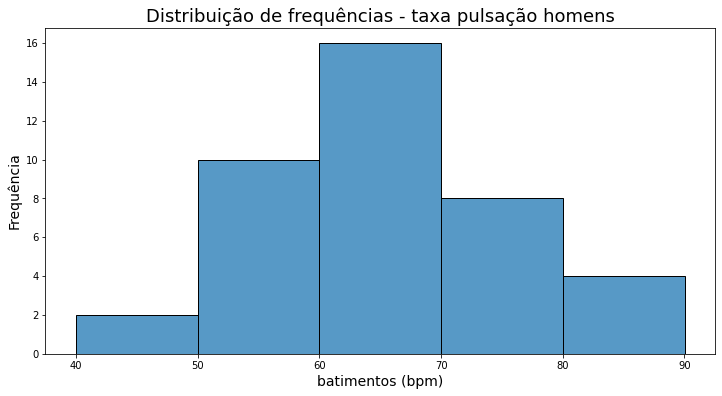

In [ ]:
#Construindo um histograma para observar graficamente a distribuição dos dados, temos:
ax = sns.histplot(base_dados['Batimentos (bpm)'],bins = classes)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - taxa pulsação homens', fontsize = 18)
ax.set_xlabel('batimentos (bpm)', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax

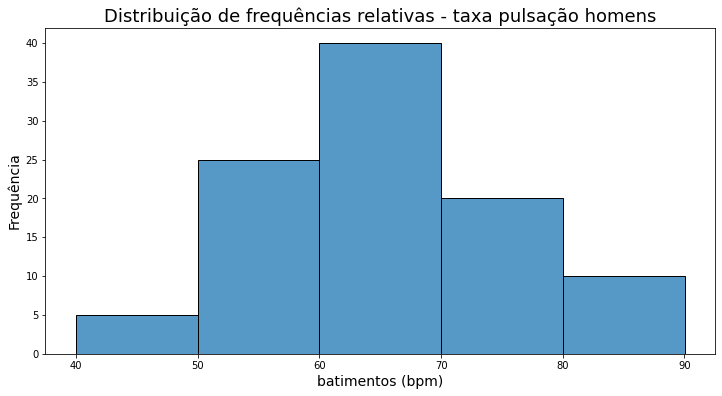

In [ ]:
#Construindo um histograma de frequência relativa para observar graficamente a distribuição dos dados, temos:
ax = sns.histplot(base_dados['Batimentos (bpm)'],bins = classes, stat = 'percent')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências relativas - taxa pulsação homens', fontsize = 18)
ax.set_xlabel('batimentos (bpm)', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax

In [ ]:
base_dados['Batimentos (bpm)'].mean()

67.25

**Conclusão sobre taxa de pulsação de homens**

A partir da distribuição de frequência e do histograma, podemos concluir que os dados de taxa de pulsação (batimentos por minuto) apresentam uma distribuição aproximadamente normal (distribuição com forma de sino), pois as (1)frequências crescem até um máximo e depois descrescem; (2) o histograma apresenta uma simetria, ou seja, a metade esquerda é aproximadamente uma imagem espelhada da metade direita. Além disso, os dados se concentram em torno de 50 à 80 batimentos por minuto, com uma média de batimentos de 67.25 batimentos por minuto. Ademais, os dados se distribuem entre 40 e 90 bpm e não apresentam outliers.

## Problema 22 - Taxas de Pulsação de Mulheres

Consulte o Conjunto de Dados 1 no Apêndice B e use as taxas de pulsação
(batimentos por minuto) de mulheres. Comece com um limite inferior de classe de 50 e use uma amplitude de classe de 10. Compare essa distribuição de frequência à encontrada no exercício anterior. Há uma diferença notável entre as taxas
de pulsação de homens e mulheres?


In [ ]:
#abrindo o dataset de dados de taxa de pulsação de mulheres, temos:
base_dados = pd.read_csv('FBODY.csv')
base_dados.head()

,AGE,PULSE,SYS,DIAS,HDL,LDL,WHITE,RED,PLATE,WT,HT,WAIST,ARMC,BMI
0,60,78,122,60,74,140,9.6,4.70,317,59.3,163.7,82.3,27.5,22.13
1,24,80,120,64,56,142,7.1,4.64,224,74.5,165.5,88.5,30.0,27.20
2,49,68,90,48,70,72,7.5,4.61,248,77.7,163.1,94.9,34.4,29.21
3,62,56,150,80,40,164,6.8,4.09,309,97.9,166.3,111.8,38.7,35.40
4,53,76,132,58,67,109,5.6,4.36,335,71.7,163.6,86.5,32.2,26.79


In [ ]:
#Renomeando as colunas, temos:
#passamos um dicionário onde as chaves são os nomes atuais e os valores são os novos nomes
colunas = {'AGE':'Idade (anos)',
           'PULSE':'Batimentos (bpm)',
           'SYS':'PSist (mmHg)',
           'DIAS':'PDiast (mmHg)',
           'HDL':'Colesterol HDL (mg/dL)',
           'LDL':'Colesterol LDL (mg/dL)',
           'WHITE':'Células brancas sangue (1.000 cel/μL)',
           'RED':'Células vermelhas sangue (1.000 cel/μL)',
           'PLATE':'Plaquetas (1.000 cel/μL)',
           'WT':'Peso (kg)',
           'HT':'Altura (cm)',
           'WAIST':'Circun cintura (cm)',
           'ARMC':'Circun braco (cm)',
           'BMI':'IMC (kg/m²)'}
base_dados.rename(colunas, axis = 'columns', inplace = True)
base_dados.head()

,Idade (anos),Batimentos (bpm),PSist (mmHg),PDiast (mmHg),Colesterol HDL (mg/dL),Colesterol LDL (mg/dL),Células brancas sangue (1.000 cel/μL),Células vermelhas sangue (1.000 cel/μL),Plaquetas (1.000 cel/μL),Peso (kg),Altura (cm),Circun cintura (cm),Circun braco (cm),IMC (kg/m²)
0,60,78,122,60,74,140,9.6,4.70,317,59.3,163.7,82.3,27.5,22.13
1,24,80,120,64,56,142,7.1,4.64,224,74.5,165.5,88.5,30.0,27.20
2,49,68,90,48,70,72,7.5,4.61,248,77.7,163.1,94.9,34.4,29.21
3,62,56,150,80,40,164,6.8,4.09,309,97.9,166.3,111.8,38.7,35.40
4,53,76,132,58,67,109,5.6,4.36,335,71.7,163.6,86.5,32.2,26.79


In [ ]:
#Salvando os dados tratados para uso em outros projetos, temos:
base_dados.to_csv('medidas_corporais_mulheres.csv')

Construindo a distribuição de frequência, temos:

In [ ]:
#valor mínimo de taxa de pulsação no dataset
base_dados['Batimentos (bpm)'].min()

56

In [ ]:
#valor máximo de taxa de pulsação no dataset
base_dados['Batimentos (bpm)'].max()

104

In [ ]:
#convenientemente assumimos que o limite inferior da primeira classe é 50 e utilizando uma amplitude fixa de tamanho 10, temos:
classes = [50,60,70,80,90,100,110]

In [ ]:
frequencia = pd.value_counts(pd.cut(x = base_dados['Batimentos (bpm)'], bins = classes, include_lowest = True),
                             sort = False)
frequencia

(49.999, 60.0]     2
(60.0, 70.0]       7
(70.0, 80.0]      19
(80.0, 90.0]       7
(90.0, 100.0]      4
(100.0, 110.0]     1
Name: Batimentos (bpm), dtype: int64

In [ ]:
percentual = pd.value_counts(pd.cut(x = base_dados['Batimentos (bpm)'], bins = classes, include_lowest = True),
                             sort = False, normalize = True) * 100
percentual

(49.999, 60.0]     5.0
(60.0, 70.0]      17.5
(70.0, 80.0]      47.5
(80.0, 90.0]      17.5
(90.0, 100.0]     10.0
(100.0, 110.0]     2.5
Name: Batimentos (bpm), dtype: float64

In [ ]:
#construindo a tabela de distribuição de frequência, temos:
dist_freq = pd.DataFrame({'Frequência':frequencia,'Porcentagem (%)':percentual})
dist_freq.rename_axis('Classes', axis = 'index', inplace = True)
dist_freq

,Frequência,Porcentagem (%)
Classes,,
"(49.999, 60.0]",2,5.0
"(60.0, 70.0]",7,17.5
"(70.0, 80.0]",19,47.5
"(80.0, 90.0]",7,17.5
"(90.0, 100.0]",4,10.0
"(100.0, 110.0]",1,2.5


A distribuição de frequência mostra que a maioria das medidas de taxa de pulsação de mulheres se concentram entre 60 e 90 batimentos por minuto. Para visualizar melhor a distribuição dos dados construiu-se o seguinte histograma:

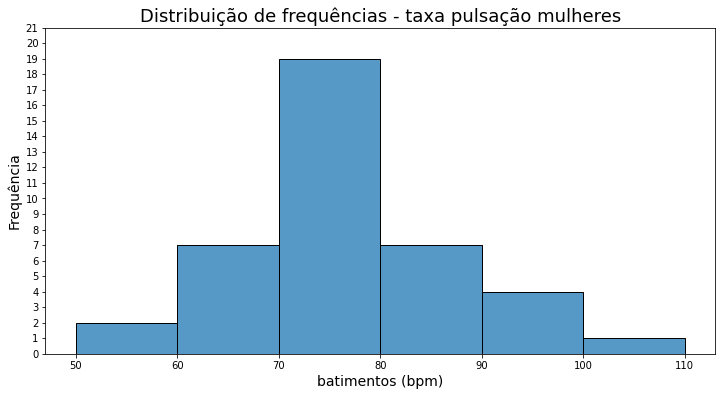

In [ ]:
#Construindo um histograma para observar graficamente a distribuição dos dados, temos:
classes = [49.999,60.01,70.01,80.01,90.01,100.01,110.01]

ax = sns.histplot(base_dados['Batimentos (bpm)'],bins = classes)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - taxa pulsação mulheres', fontsize = 18)
ax.set_xlabel('batimentos (bpm)', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_yticks([i for i in range(0,22,1)])
ax

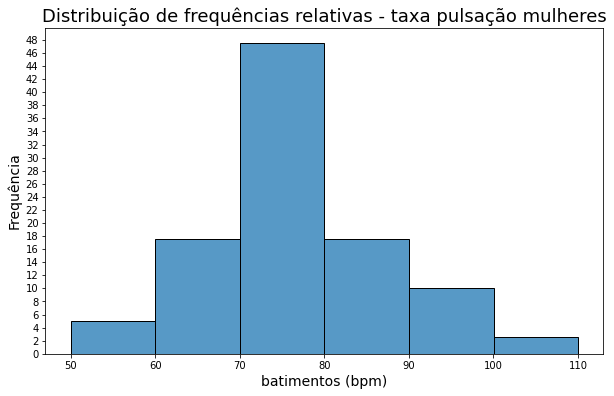

In [ ]:
#Construindo um histograma de frequência relativa para observar graficamente a distribuição dos dados, temos:
classes = [49.999,60.01,70.01,80.01,90.01,100.01,110.01]

ax = sns.histplot(base_dados['Batimentos (bpm)'],bins = classes, stat = 'percent')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de frequências relativas - taxa pulsação mulheres', fontsize = 18)
ax.set_xlabel('batimentos (bpm)', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_yticks([i for i in range(0,50,2)])
ax

**Conclusões sobre a taxa de pulsação cardíaca de mulheres**

Analisando o histograma de taxas de pulsação de mulheres, é possível verificar que os dados estão mais deslocados para a direita, em relação aos dados masculinos. Este fato nos indica que as mulheres, possivelmente, apresentam taxas de pulsação superiores em relação às dos homens.

## Comparando taxas de pulsação de homens e mulheres (problemas 21 e 22)

A partir dos resultados de taxa de pulsação de homens e mulheres, construiu-se o seguinte diagrama boxplot. Os diagramas boxplot são utilizados quando deseja-se comparar dois conjuntos de dados e visualizar a distribuição dos dados.

In [ ]:
#Primeiramente, vamos criar uma nova coluna identificando os sexos e concatenar ambos conjuntos de dados em uma nova base de dados.
base_dados_homens = pd.read_csv('medidas_corporais_homens.csv')
base_dados_homens.drop('Unnamed: 0',axis = 'columns', inplace = True)
base_dados_homens.head()

,Idade (anos),Batimentos (bpm),PSist (mmHg),PDiast (mmHg),Colesterol HDL (mg/dL),Colesterol LDL (mg/dL),Células brancas sangue (1.000 cel/μL),Células vermelhas sangue (1.000 cel/μL),Plaquetas (1.000 cel/μL),Peso (kg),Altura (cm),Circun cintura(cm),Circun braco (cm),IMC (kg/m²)
0,18,60,132,68,44,213,8.7,4.91,409,64.4,178.8,81.4,28.4,20.14
1,20,74,120,68,41,88,5.9,5.59,187,61.8,177.5,74.8,26.8,19.62
2,43,86,106,84,71,174,7.3,4.44,250,78.5,187.8,84.1,32.3,22.26
3,39,54,104,60,41,121,6.2,4.80,273,86.3,172.4,95.5,39.0,29.04
4,60,90,122,80,57,124,5.9,5.17,278,73.1,181.7,90.1,29.4,22.14


In [ ]:
#criando uma nova coluna identificando o sexo na base de dados masculinos, temos:
sexo = []
for i in base_dados_homens.index:
  sexo.append(int(0))
base_dados_homens['Sexo'] = sexo
base_dados_homens.head()

,Idade (anos),Batimentos (bpm),PSist (mmHg),PDiast (mmHg),Colesterol HDL (mg/dL),Colesterol LDL (mg/dL),Células brancas sangue (1.000 cel/μL),Células vermelhas sangue (1.000 cel/μL),Plaquetas (1.000 cel/μL),Peso (kg),Altura (cm),Circun cintura(cm),Circun braco (cm),IMC (kg/m²),Sexo
0,18,60,132,68,44,213,8.7,4.91,409,64.4,178.8,81.4,28.4,20.14,0
1,20,74,120,68,41,88,5.9,5.59,187,61.8,177.5,74.8,26.8,19.62,0
2,43,86,106,84,71,174,7.3,4.44,250,78.5,187.8,84.1,32.3,22.26,0
3,39,54,104,60,41,121,6.2,4.80,273,86.3,172.4,95.5,39.0,29.04,0
4,60,90,122,80,57,124,5.9,5.17,278,73.1,181.7,90.1,29.4,22.14,0


In [ ]:
base_dados_mulheres = pd.read_csv('medidas_corporais_mulheres.csv')
base_dados_mulheres.drop('Unnamed: 0',axis = 'columns', inplace = True)
base_dados_mulheres.head()

,Idade (anos),Batimentos (bpm),PSist (mmHg),PDiast (mmHg),Colesterol HDL (mg/dL),Colesterol LDL (mg/dL),Células brancas sangue (1.000 cel/μL),Células vermelhas sangue (1.000 cel/μL),Plaquetas (1.000 cel/μL),Peso (kg),Altura (cm),Circun cintura (cm),Circun braco (cm),IMC (kg/m²)
0,60,78,122,60,74,140,9.6,4.70,317,59.3,163.7,82.3,27.5,22.13
1,24,80,120,64,56,142,7.1,4.64,224,74.5,165.5,88.5,30.0,27.20
2,49,68,90,48,70,72,7.5,4.61,248,77.7,163.1,94.9,34.4,29.21
3,62,56,150,80,40,164,6.8,4.09,309,97.9,166.3,111.8,38.7,35.40
4,53,76,132,58,67,109,5.6,4.36,335,71.7,163.6,86.5,32.2,26.79


In [ ]:
#criando uma nova coluna identificando o sexo na base de dados femininos, temos:
sexo = []
for i in base_dados_mulheres.index:
  sexo.append(int(1))
base_dados_mulheres['Sexo'] = sexo
base_dados_mulheres.head()

,Idade (anos),Batimentos (bpm),PSist (mmHg),PDiast (mmHg),Colesterol HDL (mg/dL),Colesterol LDL (mg/dL),Células brancas sangue (1.000 cel/μL),Células vermelhas sangue (1.000 cel/μL),Plaquetas (1.000 cel/μL),Peso (kg),Altura (cm),Circun cintura (cm),Circun braco (cm),IMC (kg/m²),Sexo
0,60,78,122,60,74,140,9.6,4.70,317,59.3,163.7,82.3,27.5,22.13,1
1,24,80,120,64,56,142,7.1,4.64,224,74.5,165.5,88.5,30.0,27.20,1
2,49,68,90,48,70,72,7.5,4.61,248,77.7,163.1,94.9,34.4,29.21,1
3,62,56,150,80,40,164,6.8,4.09,309,97.9,166.3,111.8,38.7,35.40,1
4,53,76,132,58,67,109,5.6,4.36,335,71.7,163.6,86.5,32.2,26.79,1


In [ ]:
#concatenando os DataFrames masculinos e femininos, obtemos o seguinte DataFrame:
base_dados_unisex = pd.concat([base_dados_homens, base_dados_mulheres], axis = 'index')
base_dados_unisex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 39
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Idade (anos)                             80 non-null     int64  
 1   Batimentos (bpm)                         80 non-null     int64  
 2   PSist (mmHg)                             80 non-null     int64  
 3   PDiast (mmHg)                            80 non-null     int64  
 4   Colesterol HDL (mg/dL)                   80 non-null     int64  
 5   Colesterol LDL (mg/dL)                   80 non-null     int64  
 6   Células brancas sangue (1.000 cel/μL)    80 non-null     float64
 7   Células vermelhas sangue (1.000 cel/μL)  80 non-null     float64
 8   Plaquetas (1.000 cel/μL)                 80 non-null     int64  
 9   Peso (kg)                                80 non-null     float64
 10  Altura (cm)                              80 non-null

In [ ]:
#Verificando a quantidade de cada valor na variável "Sexo", temos:
base_dados_unisex['Sexo'].value_counts()

0    40
1    40
Name: Sexo, dtype: int64

Para a comparação de conjuntos de dados diferentes, podemos utilizar os diagramas de caixas modificados. Tais diagramas são úteis para comparar a dipersão de dados, onde os valores estão mais concentrados. Sendo, assim, construindo um diagrama de caixa modificado para a comparação dos diferentes conjuntos de dados, temos:

Os diagramas de boxplot modificados são construidos a partir de 5 números resumos: valor mínimo, quartil 1, quartil 2, quartil 3 e valor máximo. Além desses números, podemos definir um limite superior e um limite superior, onde acima e abaixo, respectivamente, são valores atípicos ou outliers.

calculando os numeros resumos do boxplot modificado para homens, temos:

In [ ]:
#calculando os quartis do conjunto de dados de batimentos de homens, temos:
quartis_homens = base_dados_homens['Batimentos (bpm)'].quantile([0.25,0.50,0.75])
nomes_quartis = {0.25:'Q1',
                 0.5:'Q2',
                 0.75:'Q3'}
quartis_homens.rename(index = nomes_quartis, inplace = True)
quartis_homens

Q1    60.0
Q2    67.0
Q3    74.0
Name: Batimentos (bpm), dtype: float64

In [ ]:
#Calculando o valor máximo do conjunto de batimentos de homens:
base_dados_homens['Batimentos (bpm)'].max()

90

In [ ]:
#Calculando o intervalor interquartil e os limites inferiores e superiores, temos:
Q1 = 60
Q3 = 74
IIQ = Q3 - Q1
IIQ

14

In [ ]:
#Calculando os limites inferiores e superiores, temos:
lim_inf = Q1 - 1.5*IIQ
lim_inf

39.0

In [ ]:
lim_sup = Q3 + 1.5*IIQ
lim_sup

95.0

calculando os numeros resumos do boxplot modificado para mulheres, temos:

In [ ]:
#calculando os quartis do conjunto de dados de batimentos de mulheres, temos:
quartis_mulheres = base_dados_mulheres['Batimentos (bpm)'].quantile([0.25,0.50,0.75])
nomes_quartis = {0.25:'Q1',
                 0.5:'Q2',
                 0.75:'Q3'}
quartis_mulheres.rename(index = nomes_quartis, inplace = True)
quartis_mulheres

Q1    72.0
Q2    77.0
Q3    82.0
Name: Batimentos (bpm), dtype: float64

In [ ]:
#Calculando o valor máximo do conjunto de batimentos de mulheres:
base_dados_mulheres['Batimentos (bpm)'].max()

104

In [ ]:
#Calculando o intervalo interquartil, temos:
Q1 = 72
Q3 = 82
IIQ = Q3 - Q1
IIQ

10

In [ ]:
#Calculando os limites superiores e inferiores, temos:
lim_inf = Q1 - 1.5*IIQ
lim_sup = Q3 + 1.5*IIQ

In [ ]:
lim_inf

57.0

In [ ]:
lim_sup

97.0

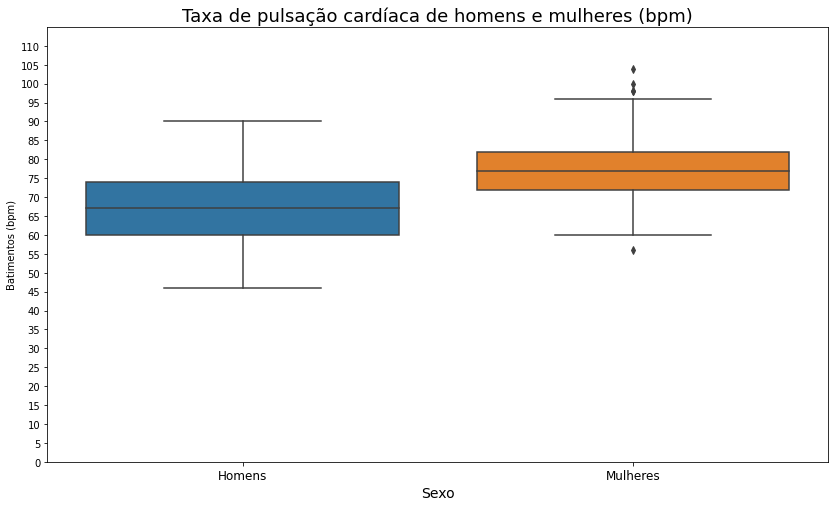

In [ ]:
ax = sns.boxplot(x = 'Sexo',y = 'Batimentos (bpm)', data = base_dados_unisex)
ax.figure.set_size_inches(14,8) #tamanho da figura
ax.set_title('Taxa de pulsação cardíaca de homens e mulheres (bpm)',fontsize = 18) #configurando o título do gráfico

ax.set_xlabel('Sexo',fontsize = 14) #configurando o eixo x

ax.set_xticklabels(labels = ['Homens','Mulheres'], fontsize = 12) #configurando os labels do eixo x

ax.set(ylim=(0, 115)) #configurando limite inferior e superior do eixo y

ax.set_yticks([i for i in range(0,115,5)])

ax

Apesar dos outliers serem definidos por critérios subjetivos e vagos, para propósito de construção de diagramas de caixa modificados podemos utilizar o seguinte critério para determinação de valores atípicos (ou outliers) no conjunto de valores:

São outliers os valores do conjunto de dados que são maiores que Q3 + 1,5*IIQ ou menores que Q1 - 1,5*IIQ. Sendo o intervalo interquartil (IIQ) dado por IIQ = Q3 - Q1, onde Q3 e Q1 representam o terceiro quartil (P75) e primeiro quartil (P25), respectivamente. Os valores de outliers são representados por pontos, tais valores são observados para o diagrama de caixa modificado do conjunto de dados das mulheres.

**Conclusões**

Visualizando o diagrama de boxplot, aparentemente há diferenças entre as taxas de pulsação cardíavas (batimentos por minuto) femininas e masculinas, o que indica um funcionamento distinto para ambos os sexos. Portanto, a taxa de pulsação, aparentemente, é maior para o sexo feminino do que para o sexo masculino.

## Magnitudes de Terremotos 


**Problema 2.23 - Magnitude de terremotos**

**Contexto dos dados**

Cinquenta dados emparelhados de magnitude/profundidade selecionados aleatoriamente de 10.594 terremotos registrados
em um ano, em uma localidade no sul da Califórnia. MAGN é a magnitude medida na escala Richter e DEPTH é a
profundidade em km. A magnitude e a profundidade descrevem, ambas, a fonte do terremoto. Nas duas tabelas a seguir,
as magnitudes e as profundidades estão emparelhadas por suas posições correspondentes nas duas tabelas. Os dados são
do Southern California Earthquake Data Center (Centro de Dados de Terremotos da Califórnia do Sul).


Consulte as magnitudes de terremotos listadas no Conjunto de Dados 16 do Apêndice B.
Comece com o limite inferior de classe de 0,00 e use uma amplitude de classe de 0,50. Usando uma interpretação muito
estrita das exigências para uma distribuição normal, as magnitudes parecem ser normalmente distribuídas?

In [ ]:
#abrindo os dados, temos:
base_dados = pd.read_csv('QUAKE.csv')
base_dados.head()

,MAG,DEPTH
0,0.70,6.6
1,0.74,2.0
2,0.64,15.3
3,0.39,17.2
4,0.70,3.2


In [ ]:
#renomeando as colunas, temos:
nomes_colunas = {'MAG':'Magnitude (escala Richter)',
                 'DEPTH':'Profundidade (km)'}
base_dados.rename(nomes_colunas, axis = 'columns', inplace = True)
base_dados.head(10)

,Magnitude (escala Richter),Profundidade (km)
0,0.70,6.6
1,0.74,2.0
2,0.64,15.3
3,0.39,17.2
4,0.70,3.2
5,2.20,2.2
6,1.98,14.8
7,0.64,5.6
8,1.22,6.1
9,0.20,9.1


In [ ]:
#Salvando os dados para uso em projetos posteriores:
base_dados.to_csv('terremotos.csv')

In [ ]:
#Visualização geral do dataset:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Magnitude (escala Richter)  50 non-null     float64
 1   Profundidade (km)           50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


Para visualizar o comportamento dos dados de magnitude, através do resumo dos dados, construiu-se a seguinte distribuição de frequência com classes de amplitude fixa.

In [ ]:
#Menor valor da base de dados
base_dados['Magnitude (escala Richter)'].min()

0.0

In [ ]:
#Maior valor da base de dados
base_dados['Magnitude (escala Richter)'].max()

2.95

In [ ]:
#Definindo as classes personalizadas, tomando 0 como o limite inferior da primeira classe e amplitude fixa de 0.5
classes = []
n = 0
while n <= 3:
  classes.append(n)
  n = n + 0.5
classes

[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

In [ ]:
#Construindo a distribuição de frequências usando o método "pd.cut()", temos:
frequencia = pd.value_counts(pd.cut(x = base_dados['Magnitude (escala Richter)'],bins = classes, include_lowest = True),
                             sort = False)
frequencia

(-0.001, 0.5]     5
(0.5, 1.0]       18
(1.0, 1.5]       16
(1.5, 2.0]        7
(2.0, 2.5]        3
(2.5, 3.0]        1
Name: Magnitude (escala Richter), dtype: int64

In [ ]:
#Construindo a distribuição de frequências relativa usando o método "pd.cut()", temos:
percentual = pd.value_counts(pd.cut(x = base_dados['Magnitude (escala Richter)'],bins = classes, include_lowest = True),
                             sort = False,
                             normalize = True) * 100
percentual

(-0.001, 0.5]    10.0
(0.5, 1.0]       36.0
(1.0, 1.5]       32.0
(1.5, 2.0]       14.0
(2.0, 2.5]        6.0
(2.5, 3.0]        2.0
Name: Magnitude (escala Richter), dtype: float64

In [ ]:
#Construindo a tabela de distribuição de frequência, obtemos:
dist_freq = pd.DataFrame({'Frequência':frequencia,'Porcentagem (%)':percentual})
dist_freq.rename_axis('Classes', axis = 'index', inplace = True)
dist_freq

,Frequência,Porcentagem (%)
Classes,,
"(-0.001, 0.5]",5,10.0
"(0.5, 1.0]",18,36.0
"(1.0, 1.5]",16,32.0
"(1.5, 2.0]",7,14.0
"(2.0, 2.5]",3,6.0
"(2.5, 3.0]",1,2.0


A tabela de distribuição de frequência indica que os dados estão deslocados para à esquerda. Portanto, há uma assimetria nos dados. Para visualizar melhor a distribuição dos dados e o comportamento da curva gaussiana de densidade, temos:

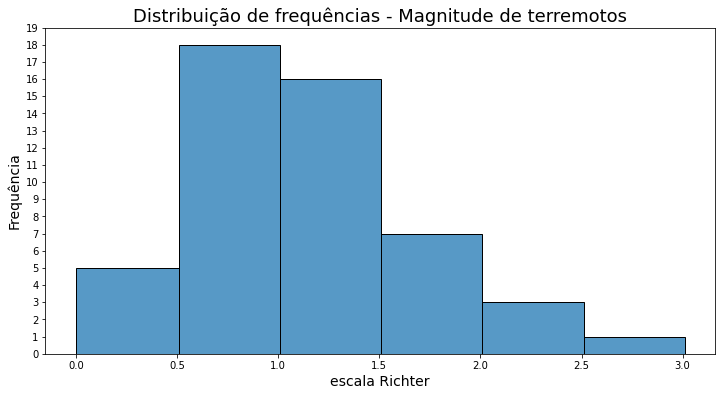

In [ ]:
#Construindo um histograma para observar graficamente a distribuição dos dados, temos:
classes = [-0.001,0.51,1.01,1.51,2.01,2.51,3.01]

ax = sns.histplot(base_dados['Magnitude (escala Richter)'],bins = classes)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - Magnitude de terremotos', fontsize = 18)
ax.set_xlabel('escala Richter', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_yticks([i for i in range(0,20,1)])
ax

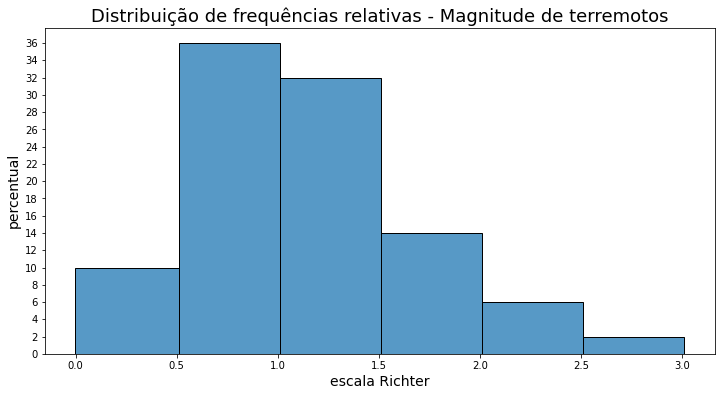

In [ ]:
#Construindo um histograma de frequências relativas para observar graficamente a distribuição dos dados, temos:
classes = [-0.001,0.51,1.01,1.51,2.01,2.51,3.01]

ax = sns.histplot(base_dados['Magnitude (escala Richter)'],bins = classes, stat = 'percent')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências relativas - Magnitude de terremotos', fontsize = 18)
ax.set_xlabel('escala Richter', fontsize = 14)
ax.set_ylabel('percentual', fontsize = 14)
ax.set_yticks([i for i in range(0,37,2)])
ax

Calculando as medidas de variação dos dados de magnitude como amplitude, desvio-padrão e variância, temos os seguintes resultados:

In [ ]:
#Calculando a amplitude dos dados de magnitude, temos:
valor_minimo = base_dados['Magnitude (escala Richter)'].min()
valor_maximo = base_dados['Magnitude (escala Richter)'].max()
amplitude = valor_maximo - valor_minimo
print('A amplitude do conjunto de valores é {} na escala Richter'.format(amplitude))

A amplitude do conjunto de valores é 2.95 na escala Richter


Os dados portanto, estão dispersos em uma faixa de amplitude de tamanho 2.95 na escala Richter. Importante notarmos que a amplitude de um conjunto de dados é dada pela diferença entre o valor máximo e o valor mínimo do conjunto de valores. Logo, a amplitude é uma medida de variação que, em geral, não é utilizada devido a sua sensibilidade a valores extremos (outliers).

In [ ]:
#Calculando a variância do conjunto de dados de magnitude, temos:
variancia_magnitude = base_dados['Magnitude (escala Richter)'].var()
print('A variância dos dados de magnitude é {} escala Richter²'.format(variancia_magnitude))

A variância dos dados de magnitude é 0.3449391428571429 escala Richter²


A variância é uma medida de variação muito utilizado em estatística, porém a unidade da variância é a unidade dos dados originais elevada ao quadrado. Uma medida de variação de melhor compreensão, pois possui unidade igual a dos dados originais, é o desvio-padrão:

In [ ]:
#Calculando o desvio-padrão do conjunto de valores de magnitude, temos:
std_magnitude = base_dados['Magnitude (escala Richter)'].std()
print('Desvio-padrão de magnitude é igual a {} em escala Richter'.format(std_magnitude))

Desvio-padrão de magnitude é igual a 0.5873151988984645 em escala Richter


**Conclusões sobre o problema**

O histograma dos dados de magnitude de terremotos nos indica que a a distribuição dos dados de magnitude não são, rigorosamente, aproximados por uma curva normal. Pois, apesar das frequências crescerem até um máximo e descrescerem, os gráficos apresentam uma assimetria na distribuição, em outras palavras, não é possível espelhar o gráfico de distribuição em torno de um eixo vertical (em torno da média). Ademais, a distribuição de dados é assimétrica à direita (positivamente assimétrica) 

**Problema 3.2.25 - Use as magnitudes (escala Richter) dos terremotos listadas no Conjunto de Dados 16 no Apêndice B.
Em 1989, a área da baía de San Francisco foi atingida por um terremoto que mediu 7,0 na escala Richter. O terremoto
ocorreu durante o período de aquecimento para o terceiro jogo da World Series de beisebol. A magnitude desse terremoto
durante a World Series é um valor atípico (valor de dado muito afastado dos demais valores) quando considerada no
contexto dos dados amostrais apresentados no Conjunto de Dados 16? Explique.**

**Solução do problema**

Para verificar se o valor 7,0 na escala Richter é um outlier, precisamos calcular estatísticas amostrais de centro, como média e mediana. Se o valor de 7,0 se afastar muito da média, mediana e estiver afastado à direita da distribuição de dados, podemos concluir que o valor medido é um outlier. Lembrando que estamos considerando apenas os dados amostrais que foram coletados.

In [ ]:
#calculando a média, temos:
base_dados['Magnitude (escala Richter)'].mean()

1.1842000000000001

In [ ]:
#calculando a mediana, temos:
base_dados['Magnitude (escala Richter)'].median()

1.2349999999999999

**Conclusão**

A média de magnitudes de terremotos registrados é de 1,18 na escala Richter e a mediana é 1,23 na escala Richter. Com o auxílio do histograma e das medidas de média e mediana, podemos afirmar que o valor de 7,0 é um outlier, uma vez que se encontra muito afastado dos demais valores amostrais.

## Problema 24 - Profundidades de Terremotos 

Consulte as profundidades de terremotos listadas no Conjunto de Dados 16 do
Apêndice B. Comece com o limite inferior de classe de 1,00 km e use uma amplitude de classe de 4,00 km. Usando uma
interpretação muito estrita das exigências para uma distribuição normal, as profundidades parecem ser normalmente
distribuídas?

Construindo a distribuição de frequência para a variável 'Profundidade (km)', temos:

In [ ]:
#visualizando o menor valor da variável 'Profundidade (km)'
base_dados['Profundidade (km)'].min()

2.0

In [ ]:
#visualizando o maior valor da variável 'Profundidade (km)'
base_dados['Profundidade (km)'].max()

18.9

convenientemente podemos tomar o valor 1 como o limite inferior da primeira classe e o valor 21 como o limite superior da última classe, temos:

In [ ]:
#definindo os limites inferiores e superiores de cada classe da distribuição de frequência, temos:
classes = []
n = 1
while n <= 21:
  classes.append(n)
  n = n + 4
classes

[1, 5, 9, 13, 17, 21]

In [ ]:
#construindo distribuição de frequência básica
frequencia = pd.value_counts(pd.cut(x = base_dados['Profundidade (km)'],bins = classes, include_lowest = True), sort = False)
frequencia

(0.999, 5.0]     7
(5.0, 9.0]      21
(9.0, 13.0]      4
(13.0, 17.0]    12
(17.0, 21.0]     6
Name: Profundidade (km), dtype: int64

In [ ]:
#construindo distribuição de frequência relativa
percentual = pd.value_counts(pd.cut(x = base_dados['Profundidade (km)'],bins = classes, include_lowest = True),
                             sort = False,
                             normalize = True) * 100
percentual

(0.999, 5.0]    14.0
(5.0, 9.0]      42.0
(9.0, 13.0]      8.0
(13.0, 17.0]    24.0
(17.0, 21.0]    12.0
Name: Profundidade (km), dtype: float64

In [ ]:
#construindo a tabela de distribuição de frequência, temos:
dist_freq = pd.DataFrame({'Frequência':frequencia,'Porcentagem (%)':percentual})
dist_freq.rename_axis('Classes', axis = 'index', inplace = True)
dist_freq

,Frequência,Porcentagem (%)
Classes,,
"(0.999, 5.0]",7,14.0
"(5.0, 9.0]",21,42.0
"(9.0, 13.0]",4,8.0
"(13.0, 17.0]",12,24.0
"(17.0, 21.0]",6,12.0


Construindo o histograma podemos visualizar graficamente o comportamento da variável "Profundidade (km)":

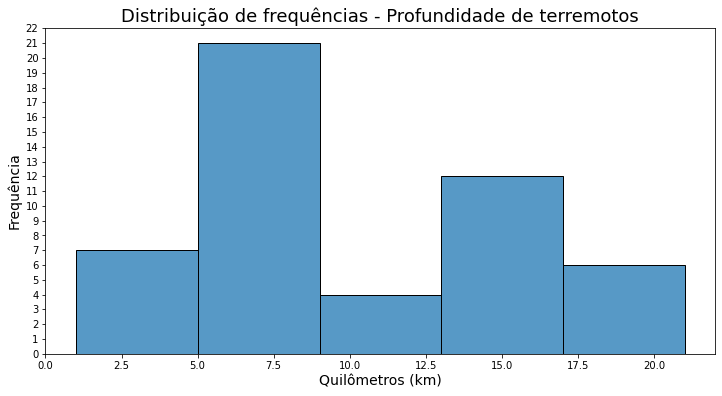

In [ ]:
#Construindo um histograma para observar graficamente a distribuição dos dados, temos:
classes = [0.999,5.01,9.01,13.01,17.01,21.01]

ax = sns.histplot(base_dados['Profundidade (km)'],bins = classes)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - Profundidade de terremotos', fontsize = 18)
ax.set_xlabel('Quilômetros (km)', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_yticks([i for i in range(0,23,1)])
ax

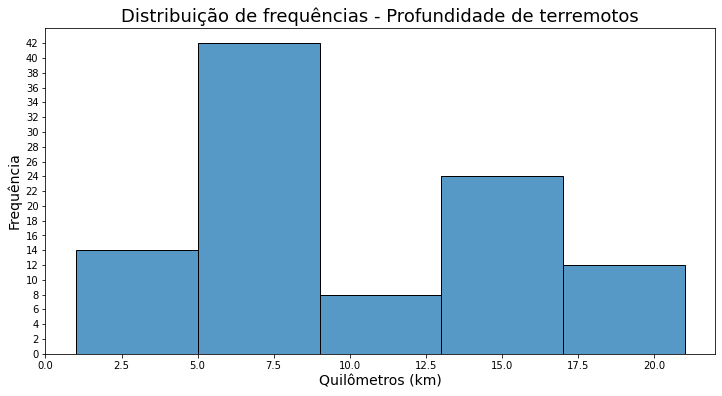

In [ ]:
#Construindo um histograma de frequências relativas para observar graficamente a distribuição dos dados, temos:
classes = [0.999,5.01,9.01,13.01,17.01,21.01]

ax = sns.histplot(base_dados['Profundidade (km)'],bins = classes, stat = 'percent')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - Profundidade de terremotos', fontsize = 18)
ax.set_xlabel('Quilômetros (km)', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_yticks([i for i in range(0,43,2)])
ax

**Conclusões sobre o problema**

Visualizando a tabela de distribuição de frequência e o histograma acima, é possível verificar que a distribuição do conjunto de dados não pode ser aproximado por uma distribuição normal, uma vez que a distribuição dos dados apresentam dois máximos locais. Note que nas primeiras classes a frequência aumenta e entr 9-13 há uma diminuição significativa da frequência e, em seguida, há um aumento e diminuição das frequência. Portanto, não é possível espelhar o gráfico em torno de um eixo vertical.

## Problema 27 - Tempos de Chegada de Voo

Consulte o Conjunto de Dados 15 do Apêndice B e use os tempos de atraso nas
chegadas de voos. Comece com o limite inferior de classe de – 60 min e use uma amplitude de classe de 30 min. Com
base no resultado, parece que a maioria dos voos da American Airlines que partem do JFK para LAX estão perto de
chegar a Los Angeles sem muito atraso?

**Contexto do problema**

Todos os voos são da American Airlines de Nova York (JFK) para Los Angeles (LAX), e todos os voos ocorreram em
janeiro de ano recente. **ID** é o número de identificação na cauda do avião. **ATDEC** é o tempo de atraso na decolagem
(minutos), e número negativos correspondem a voos que partiram antes do horário. **TXDEC** é o tempo (minutos) que o
avião usou para taxiar do terminal até o ponto de decolagem. **TXATER** é o tempo (minutos) que o avião usou para taxiar
até o terminal depois de aterrissar. **ATATER** é o tempo de atraso na chegada (minutos), e números negativos
correspondem a voos que chegaram cedo (antes do horário previsto). Os dados são do Bureau of Transportation (Birô de
Transportes).

Para responder a pergunta do problema, devemos analisar o tempo de atraso na chegada (variável **"ATATER"**). Logo, devemos verificar como os dados de tempo de atraso estão distribuídos.


In [3]:
#abrindo o dataset, temos:
base_dados = pd.read_csv('FLIGHTS.csv')
base_dados.head(10)

,VOO,ID,ATDEC,TXDEC,TXATER,ATATER
0,1,N338AA,-2,30,12,-32
1,1,N329AA,-1,19,13,-25
2,1,N319AA,-2,12,8,-26
3,1,N319AA,2,19,21,-6
4,1,N329AA,-2,18,17,5
5,1,N320AA,0,22,11,-15
6,1,N321AA,-2,37,12,-17
7,1,N338AA,-3,13,12,-36
8,1,N327AA,-5,14,15,-29
9,1,N319AA,-4,15,26,-18


In [4]:
#A variável "VOO" não é de interesse prático para os nosso problemas, protanto, podemos removê-la do dataset
base_dados.drop('VOO', axis = 'columns', inplace = True)
base_dados.head(10)

,ID,ATDEC,TXDEC,TXATER,ATATER
0,N338AA,-2,30,12,-32
1,N329AA,-1,19,13,-25
2,N319AA,-2,12,8,-26
3,N319AA,2,19,21,-6
4,N329AA,-2,18,17,5
5,N320AA,0,22,11,-15
6,N321AA,-2,37,12,-17
7,N338AA,-3,13,12,-36
8,N327AA,-5,14,15,-29
9,N319AA,-4,15,26,-18


In [5]:
#Renomeando as colunas para facilitar a identificação das variáveis e suas unidades de medida, temos:
nomes_colunas = {'ID':'ID Aviao',
                 'ATDEC':'Atraso Dec (min)',
                 'TXDEC':'Tax ter dec (min)',
                 'TXATER':'Tax ter aterr (min)',
                 'ATATER':'Atraso chegada (min)'}
base_dados.rename(nomes_colunas, axis = 'columns', inplace = True)

In [6]:
base_dados.head(10)

,ID Aviao,Atraso Dec (min),Tax ter dec (min),Tax ter aterr (min),Atraso chegada (min)
0,N338AA,-2,30,12,-32
1,N329AA,-1,19,13,-25
2,N319AA,-2,12,8,-26
3,N319AA,2,19,21,-6
4,N329AA,-2,18,17,5
5,N320AA,0,22,11,-15
6,N321AA,-2,37,12,-17
7,N338AA,-3,13,12,-36
8,N327AA,-5,14,15,-29
9,N319AA,-4,15,26,-18


In [7]:
#Salvando a base de dados devidamente tratada, temos:
base_dados.to_csv('voos.csv')

Para obter um resumo dos dados, contruiu-se uma distribuição de frequência para a variável "ATATER". A partir da distribuição de frequência temos uma resumo dos dados e podemos observar como os dados estão distribuídos ao longo das classes.

In [8]:
#visualizando o valor mínimo da variável "Atraso chegada (min)", temos:
base_dados['Atraso chegada (min)'].min()

-46

In [9]:
#visualizando o valor máximo da variável "Atraso chegada (min)", temos:
base_dados['Atraso chegada (min)'].max()

106

In [10]:
#definindo as classes da distribuição de frequência, temos:
classes = []
n = -60
while n <= 120:
  classes.append(n)
  n = n + 30
classes

[-60, -30, 0, 30, 60, 90, 120]

In [11]:
#Construindo a distribuição de frequência, temos:
frequencia = pd.value_counts(pd.cut(x = base_dados['Atraso chegada (min)'], bins = classes, include_lowest = True),
                             sort = False)
frequencia

(-60.001, -30.0]    12
(-30.0, 0.0]        26
(0.0, 30.0]          7
(30.0, 60.0]         1
(60.0, 90.0]         0
(90.0, 120.0]        2
Name: Atraso chegada (min), dtype: int64

In [12]:
#Construindo a distribuição de frequência relativa, temos:
percentual = pd.value_counts(pd.cut(x = base_dados['Atraso chegada (min)'], bins = classes, include_lowest = True),
                             sort = False,
                             normalize = True) * 100
percentual

(-60.001, -30.0]    25.000000
(-30.0, 0.0]        54.166667
(0.0, 30.0]         14.583333
(30.0, 60.0]         2.083333
(60.0, 90.0]         0.000000
(90.0, 120.0]        4.166667
Name: Atraso chegada (min), dtype: float64

In [13]:
#Construindo a tabela de distribuição de frequência, temos:
dist_freq = pd.DataFrame({'Frequência':frequencia,'Porcentagem(%)':percentual})
dist_freq.rename_axis('Classes', axis = 'index', inplace = True)
dist_freq

,Frequência,Porcentagem(%)
Classes,,
"(-60.001, -30.0]",12,25.000000
"(-30.0, 0.0]",26,54.166667
"(0.0, 30.0]",7,14.583333
"(30.0, 60.0]",1,2.083333
"(60.0, 90.0]",0,0.000000
"(90.0, 120.0]",2,4.166667


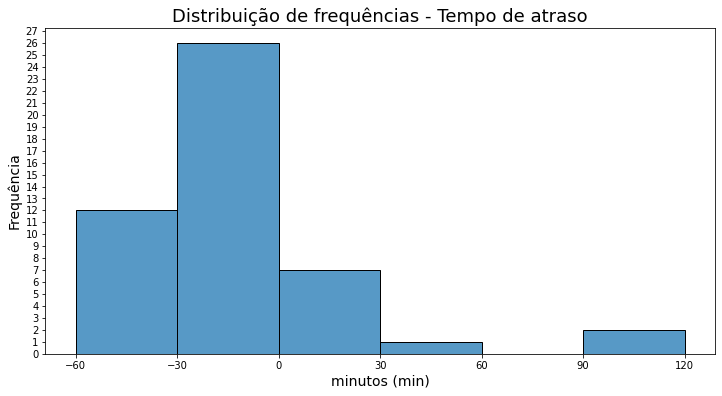

In [14]:
#Construindo um histograma para observar graficamente a distribuição dos dados, temos:
classes = [-60.001,-29.9999,0.001,30.001,60.001,90.001,120.001]
ax = sns.histplot(base_dados['Atraso chegada (min)'], bins = classes)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - Tempo de atraso', fontsize = 18)
ax.set_xlabel('minutos (min)', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_yticks([i for i in range(0,28,1)])
ax.set_xticks([-60.001,-29.9999,0.001,30.001,60.001,90.001,120.001])
ax

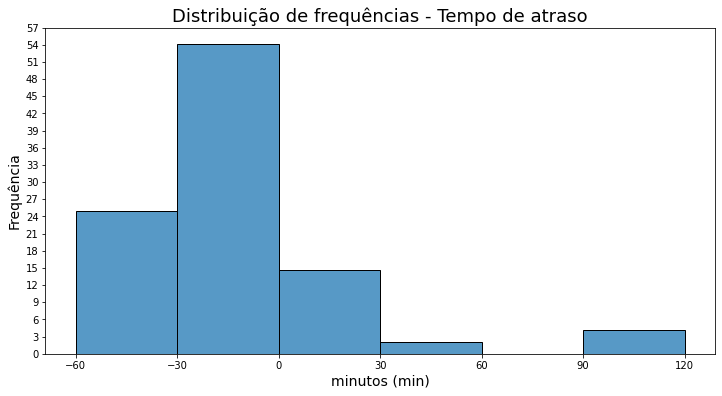

In [15]:
#Construindo um histograma de frequência relativa para observar graficamente a distribuição dos dados, temos:
classes = [-60.001,-29.9999,0.001,30.001,60.001,90.001,120.001]
ax = sns.histplot(base_dados['Atraso chegada (min)'], bins = classes, stat = 'percent')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - Tempo de atraso', fontsize = 18)
ax.set_xlabel('minutos (min)', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_yticks([i for i in range(0,60,3)])
ax.set_xticks([-60.001,-29.9999,0.001,30.001,60.001,90.001,120.001])
ax

**Conclusões sobre o problema**

A partir da tabela de distribuição de frequência e histograma para a variável "Atraso chegada (min)", é possível concluir que 79% dos voos da American Airlines, de Nova York (JFK) para Los Angeles (LAX), chegam antes ou no horário previsto. Enquanto 14,6% dos voos atrasam em até 30 minutos. Apenas, aproximadamente, 6% dos voos apresentam atraso entre 30 e 120 minutos. Portanto, a partir dos dados analisados, parece que os voos não atrasam muito. Ainda sobre a análise do conjunto de dados, os valores entre 90 e 120 minutos são candidatos a valores outliers (muito distante dos demais). Os valores de outliers podem ser erros de entrada de dados ou não, tais valores devem ser verificados para avaliar a validade. Também é possível visualizar que o tempo de atraso estão distribuídos entre -60 e 60 minutos, com a grande maioria se concentrando entre -60 e 30 minutos.

## Tempos de Taxiamento para Decolagem de Voos

**Contexto da base de dados**

Para avaliar o tempo de taxiamento para decolagem devemos estuar a variável "Tax ter dec (min)". Se a maioria dis dados estiverem concentrados em  uma pequena faixa de valores poderemos afirmar que o tempo de taxiamento pode ser predito com precisão razoável. Caso contrário, não será possível predizer o tempo com boa precisão. Para responder a pergunta do problema, construiu-se uma distribuição de frequência básica e relativa, assim como um histograma para visualizar graficamente a distribuição dos dados. 

**Problema 2.28 - Tempos de taxiamento para decolagem de voos**

Consulte o Conjunto de Dados 15 no Apêndice B e use os
tempos necessários de taxiamento para a decolagem. Comece com um limite inferior de classe de 10 min e use uma
amplitude de classe de 5 min. Com base no resultado, parece que o tempo necessário de taxiamento para decolagem
possa ser predito com precisão razoável?


In [ ]:
from sys import base_prefix
#Abrindo a base de dados de voos, temos:
base_dados = pd.read_csv('voos.csv')
base_dados.head(10)

,Unnamed: 0,ID Aviao,Atraso Dec (min),Tax ter dec (min),Tax ter aterr (min),Atraso chegada (min)
0,0,N338AA,-2,30,12,-32
1,1,N329AA,-1,19,13,-25
2,2,N319AA,-2,12,8,-26
3,3,N319AA,2,19,21,-6
4,4,N329AA,-2,18,17,5
5,5,N320AA,0,22,11,-15
6,6,N321AA,-2,37,12,-17
7,7,N338AA,-3,13,12,-36
8,8,N327AA,-5,14,15,-29
9,9,N319AA,-4,15,26,-18


In [ ]:
#Visualizando o menor valor da variável "Tax ter dec (min)", temos:
base_dados['Tax ter dec (min)'].min()

12

In [ ]:
#Visualizando o maior valor da variável "Tax ter dec (min)", temos:
base_dados['Tax ter dec (min)'].max()

49

In [ ]:
#Definindo as classes personalizadas de amplitude fixa, temos:
classes = []
n = 10
classes.append(n)
while n < base_dados['Tax ter dec (min)'].max():
  n = n + 5
  classes.append(n)
classes

[10, 15, 20, 25, 30, 35, 40, 45, 50]

In [ ]:
#Construindo a distribuição de frequência básica
frequencia = pd.value_counts(pd.cut(x = base_dados['Tax ter dec (min)'], bins = classes, include_lowest = True),
                             sort = False)
frequencia

(9.999, 15.0]    15
(15.0, 20.0]     17
(20.0, 25.0]      7
(25.0, 30.0]      2
(30.0, 35.0]      2
(35.0, 40.0]      1
(40.0, 45.0]      3
(45.0, 50.0]      1
Name: Tax ter dec (min), dtype: int64

In [ ]:
#Construindo a distribuição de frequência acumulada
frequencia_acumulada  = pd.value_counts(pd.cut(x = base_dados['Tax ter dec (min)'], bins = classes, include_lowest = True),
                                        sort = False)
antigo = 0
for i in frequencia_acumulada.index:
  frequencia_acumulada[i] = frequencia_acumulada[i] + antigo
  antigo = frequencia_acumulada[i]

frequencia_acumulada

(9.999, 15.0]    15
(15.0, 20.0]     32
(20.0, 25.0]     39
(25.0, 30.0]     41
(30.0, 35.0]     43
(35.0, 40.0]     44
(40.0, 45.0]     47
(45.0, 50.0]     48
Name: Tax ter dec (min), dtype: int64

In [ ]:
#construindo distribuição de frequência básica
percentual = pd.value_counts(pd.cut(x = base_dados['Tax ter dec (min)'], bins = classes, include_lowest = True),
                             sort = False,
                             normalize = True) * 100
percentual

(9.999, 15.0]    31.250000
(15.0, 20.0]     35.416667
(20.0, 25.0]     14.583333
(25.0, 30.0]      4.166667
(30.0, 35.0]      4.166667
(35.0, 40.0]      2.083333
(40.0, 45.0]      6.250000
(45.0, 50.0]      2.083333
Name: Tax ter dec (min), dtype: float64

In [ ]:
#construindo distribuição de frequencia acumulada
percentual_acumulado = pd.value_counts(pd.cut(x = base_dados['Tax ter dec (min)'], bins = classes, include_lowest = True),
                             sort = False,
                             normalize = True) * 100
antigo = 0
for i in percentual_acumulado.index:
  percentual_acumulado[i] = percentual_acumulado[i] + antigo
  antigo = percentual_acumulado[i]
percentual_acumulado

(9.999, 15.0]     31.250000
(15.0, 20.0]      66.666667
(20.0, 25.0]      81.250000
(25.0, 30.0]      85.416667
(30.0, 35.0]      89.583333
(35.0, 40.0]      91.666667
(40.0, 45.0]      97.916667
(45.0, 50.0]     100.000000
Name: Tax ter dec (min), dtype: float64

In [ ]:
#Criando a distribuição de frequencias básica e relativa, temos:
dist_freq = pd.DataFrame({'Frequências':frequencia,'Porcentagem (%)':percentual})
dist_freq.rename_axis('Classes', axis = 'columns', inplace = True)
dist_freq

Classes,Frequências,Porcentagem (%)
"(9.999, 15.0]",15,31.250000
"(15.0, 20.0]",17,35.416667
"(20.0, 25.0]",7,14.583333
"(25.0, 30.0]",2,4.166667
"(30.0, 35.0]",2,4.166667
"(35.0, 40.0]",1,2.083333
"(40.0, 45.0]",3,6.250000
"(45.0, 50.0]",1,2.083333


In [ ]:
#Criando distribuição de frequencia acumulada, temos:
dist_freq_acumulada = pd.DataFrame({'Frequência acumulada':frequencia_acumulada,'Percentual acumulado (%)':percentual_acumulado})
dist_freq_acumulada.rename_axis('Classes', axis = 'index', inplace = True)

#modificando os índices para recriar os rótulos de classes
dist_freq_acumulada = dist_freq_acumulada.reset_index()
dist_freq_acumulada.drop('Classes', axis = 'columns', inplace = True)

#definindo os novos rótulos de classes:
indices = {0:'10 < tempo <= 15',
           1:'10 < tempo <= 20',
           2:'10 < tempo <= 25',
           3:'10 < tempo <= 30',
           4:'10 < tempo <= 35',
           5:'10 < tempo <= 40',
           6:'10 < tempo <= 45',
           7:'10 < tempo <= 50'}

dist_freq_acumulada.rename(indices, axis = 'index', inplace = True)
dist_freq_acumulada.rename_axis('Classes', axis = 'index', inplace = True)
dist_freq_acumulada

,Frequência acumulada,Percentual acumulado (%)
Classes,,
10 < tempo <= 15,15,31.250000
10 < tempo <= 20,32,66.666667
10 < tempo <= 25,39,81.250000
10 < tempo <= 30,41,85.416667
10 < tempo <= 35,43,89.583333
10 < tempo <= 40,44,91.666667
10 < tempo <= 45,47,97.916667
10 < tempo <= 50,48,100.000000


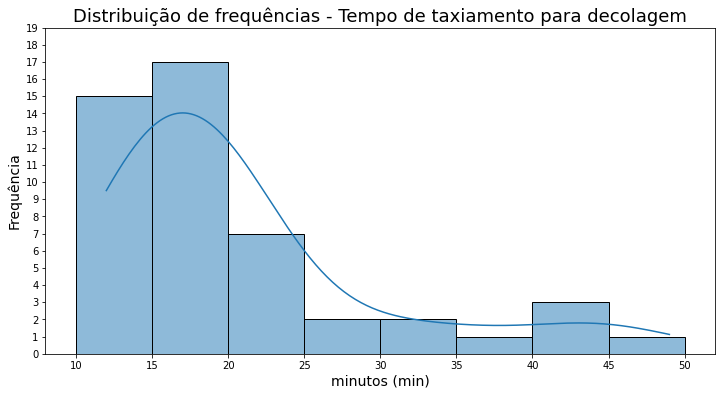

In [ ]:
#Construindo um histograma para observar graficamente a distribuição dos dados, temos:
classes = [10,15.001,20.001,25.001,30.001,35.001,40.001,45.001,50.001]
ax = sns.histplot(base_dados['Tax ter dec (min)'], bins = classes, kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - Tempo de taxiamento para decolagem', fontsize = 18)
ax.set_xlabel('minutos (min)', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_yticks([i for i in range(0,20,1)])
ax

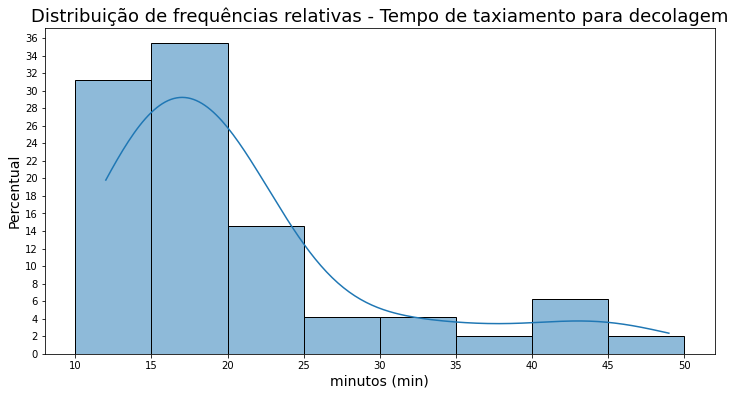

In [ ]:
#Construindo um histograma de frequência relativa para observar graficamente a distribuição dos dados, temos:
classes = [10,15.001,20.001,25.001,30.001,35.001,40.001,45.001,50.001]
ax = sns.histplot(base_dados['Tax ter dec (min)'], bins = classes, stat = 'percent', kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências relativas - Tempo de taxiamento para decolagem', fontsize = 18)
ax.set_xlabel('minutos (min)', fontsize = 14)
ax.set_ylabel('Percentual', fontsize = 14)
ax.set_yticks([i for i in range(0,37,2)])
ax

**Medidas de centro**

In [ ]:
#calculando a média, temos:
base_dados['Tax ter dec (min)'].mean()

20.979166666666668

In [ ]:
#calculando a mediana, temos:
base_dados['Tax ter dec (min)'].median()

18.5

**Medidas de variação**

Para avaliarmos como os dados variam em relação à média, podemos utilizar a variância e o desvio-padrão. Outra medida de variação é a amplitude, que é obtida a partir da diferença entre o valor máximo e o valor mínimo do conjunto de dados. Sendo assim, calculando as medidas de variação dos dados de tempo de taxiamento do terminal do aeroporto até a decolagem, temos os seguintes resultados:

In [ ]:
#Calculando a amplitude do conjunto de dados de tempo de taxiamento, temos:
valor_minimo = base_dados['Tax ter dec (min)'].min()
valor_maximo = base_dados['Tax ter dec (min)'].max()
amplitude = valor_maximo - valor_minimo
print('A amplitude do conjunto de dados é igual a {} minutos'.format(amplitude))

A amplitude do conjunto de dados é igual a 37 minutos


Portanto, os dados de tempo de taxiamento se distribuem ao longo de uma faixa de valores de amplitude igual a 37 minutos. Importante frisarmos que a amplitude é uma medida de variação que, em geral, não é utilizada devido a sua sensibilidade a valores extremos (outliers).

In [ ]:
#Calculando a variância, temos:
variancia = base_dados['Tax ter dec (min)'].var()
print('A variância dos dados é igual a {} min²'.format(variancia))

A variância dos dados é igual a 85.510195035461 min²


In [ ]:
#Calculando o desvio-padrão, temos:
std_taxiamento = base_dados['Tax ter dec (min)'].std()
print('O desvio-padrão do tempo de taxiamento é igual a {} min'.format(std_taxiamento))

O desvio-padrão do tempo de taxiamento é igual a 9.247172272400952 min


**Conclusões sobre o problema**

Os resultados obtidos na distribuição de frequência, distribuição de frequência acumulada  e histograma da variável "'Tax ter dec (min)", é possível concluir que é o tempo de taxiamento entre o terminal e a decolagem não pode ser predito com razoável precisão, umas vez que 81% dos dados de tempo se encontram entre 10 minutos e 25 minutos, e 66% dos dados estão entre 10-20 minutos. A maioria dos dados de tempo estão distribuídos entre 10 e 25 minutos. Essas diferenças entre os dados devem ser investigadas para identificação de variáveis que afetam o tempo de taxiamento como, por exemplo, clima, horário, etc. Ademais, os dados são assimétricos à direita (cauda se estende à direita), tal assimetria também é denominada de distribuição de dados positivamente assimétrica.

**Problema 3.2.26 - Dados de voos**

Consulte o Conjunto de Dados 15 no Apêndice B e use os tempos de taxiamento para decolagem. Para
a American Airlines, como é útil a determinação da média?

In [ ]:
base_dados.head()

,Unnamed: 0,ID Aviao,Atraso Dec (min),Tax ter dec (min),Tax ter aterr (min),Atraso chegada (min)
0,0,N338AA,-2,30,12,-32
1,1,N329AA,-1,19,13,-25
2,2,N319AA,-2,12,8,-26
3,3,N319AA,2,19,21,-6
4,4,N329AA,-2,18,17,5


In [ ]:
#calculando a média de tempos de taxiamento para decolagem, temos:
base_dados['Tax ter dec (min)'].mean()

20.979166666666668

In [ ]:
#calculando a mediana de tempos de taxiamento para decolagem, temos:
base_dados['Tax ter dec (min)'].median()

18.5

**Conclusões**

Os dados de tempo de taxiamento do terminal do aeroporto até a decolagem possui média de 20.98 minutos e mediana de 18.5 minutos. Os dados de média e mediana são medidas de centro úteis para determinar onde os dados estão concentrados. Como o tempo médio de taxiamento é de 21 minutos, espera-se que em cada voo os aviões taxiem durante 21 minutos até a decolagem.

## Conjunto de dados 12 (Presidentes dos Estados Unidos)

**Contexto dos dados**

Age é a idade em anos no momento da posse. Days é o número de dias passados como presidente. Years é o
número de anos vividos depois da primeira posse. Ht é a altura (cm) do presidente. HtOpp é a altura (cm) do
principal oponente na disputa presidencial. Nota: Presidentes que assumiram o cargo em resultado de assassinato ou
renúncia não estão incluídos.

In [ ]:
#Abrindo a base de dados, temos:
base_dados = pd.read_csv('POTUS.csv')
base_dados.head()

,President,Age,Days,Years,Ht,HtOpp
0,Washington,57,2864.0,10.0,188,NaN
1,J. Adams,61,1460.0,29.0,170,189.0
2,Jefferson,57,2921.0,26.0,189,170.0
3,Madison,57,2921.0,28.0,163,NaN
4,Monroe,58,2921.0,15.0,183,NaN


In [ ]:
#Visualizando informações gerais sobre a base de dados, temos
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   President  38 non-null     object 
 1   Age        38 non-null     int64  
 2   Days       37 non-null     float64
 3   Years      33 non-null     float64
 4   Ht         38 non-null     int64  
 5   HtOpp      34 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.9+ KB


In [ ]:
#renomeando as colunas, temos:
nomes_colunas = {'President':'Presidente',
                 'Age':'Idade na posse',
                 'Days':'Dias como presidente',
                 'Years':'Anos vividos depois da posse',
                 'Ht':'Altura (cm)',
                 'HtOpp':'Altura opositor (cm)'}
base_dados.rename(nomes_colunas, axis = 'columns', inplace = True)

In [ ]:
base_dados.head()

,Presidente,Idade na posse,Dias como presidente,Anos vividos depois da posse,Altura (cm),Altura opositor (cm)
0,Washington,57,2864.0,10.0,188,NaN
1,J. Adams,61,1460.0,29.0,170,189.0
2,Jefferson,57,2921.0,26.0,189,170.0
3,Madison,57,2921.0,28.0,163,NaN
4,Monroe,58,2921.0,15.0,183,NaN


**Analisando a variável 'Anos vividos depois da posse', obtemos os seguintes resultados:**

Primeiramente, contruiu-se uma distribuição de frequência básica e relativa para resumir os dados. Em seguida, construiu-se histograma de distribuição de frequência e histograma de distribuição de frequência relativa para observar a distribuição dos dados.

In [ ]:
#Visualizando menor valor de anos vividos depois da primeira posse:
base_dados['Anos vividos depois da posse'].min()

0.0

In [ ]:
#Visualizando maior valor de anos vividos depois da primeira posse:
base_dados['Anos vividos depois da posse'].max()

36.0

Para definir o numero de classes de amplitude fixa para variáveis quantitativas, utilizamos a regra de Sturges dada pela seguinte fórmula:



**Regra de Sturges**

 $$k = 1 + \frac {10}{3}\log_{10}n$$

In [ ]:
base_dados['Anos vividos depois da posse'].shape[0]

38

In [ ]:
#Definindo o numero de classes de amplitude fixa, temos:

n = base_dados['Anos vividos depois da posse'].shape[0]

k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))
k

6

In [ ]:
#Construindo a distribuição de frequência básica, temos:
frequencia = pd.value_counts(pd.cut(x = base_dados['Anos vividos depois da posse'], bins = k, include_lowest = True),
                             sort = False)
frequencia

(-0.037, 6.0]    8
(6.0, 12.0]      7
(12.0, 18.0]     7
(18.0, 24.0]     4
(24.0, 30.0]     6
(30.0, 36.0]     1
Name: Anos vividos depois da posse, dtype: int64

In [ ]:
#Construindo a distribuição de frequência relativa, temos:
percentual = pd.value_counts(pd.cut(x = base_dados['Anos vividos depois da posse'], bins = k, include_lowest = True),
                             sort = False,
                             normalize = True) * 100
percentual

(-0.037, 6.0]    24.242424
(6.0, 12.0]      21.212121
(12.0, 18.0]     21.212121
(18.0, 24.0]     12.121212
(24.0, 30.0]     18.181818
(30.0, 36.0]      3.030303
Name: Anos vividos depois da posse, dtype: float64

In [ ]:
#Construindo a tabela de frequência básica e relativa, temos:
dist_freq = pd.DataFrame({'Frequência':frequencia,'Porcentagem (%)':percentual})
dist_freq.rename_axis('Classes', axis = 'columns', inplace = True)
dist_freq

Classes,Frequência,Porcentagem (%)
"(-0.037, 6.0]",8,24.242424
"(6.0, 12.0]",7,21.212121
"(12.0, 18.0]",7,21.212121
"(18.0, 24.0]",4,12.121212
"(24.0, 30.0]",6,18.181818
"(30.0, 36.0]",1,3.030303


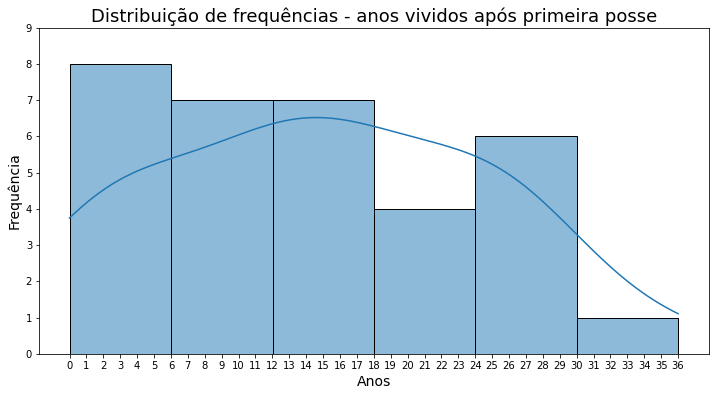

In [ ]:
#Construindo um histograma para observar graficamente a distribuição dos dados, temos:
classes = [0,6.01,12.01,18.01,24.01,30.01,36.01]
ax = sns.histplot(base_dados['Anos vividos depois da posse'], bins = classes, kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - anos vividos após primeira posse', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_yticks([i for i in range(0,10,1)])
ax.set_xticks([i for i in range(0,37,1)])
ax

Calculando a média e mediana dos anos vividos após a primeira posse a partir dos dados amostrais originais, temos:

In [ ]:
#Média de anos vividos após a primeira posse
base_dados['Anos vividos depois da posse'].mean()

15.030303030303031

In [ ]:
#Mediana de anos vividos após a primeira posse
base_dados['Anos vividos depois da posse'].median()

16.0

**Medidas de variação da variável 'Anos vividos depois da posse'**

Para avaliar como os dados estão distribuídos em relação à média, podemos utilizar medidas de variação como a variância e desvio padrão, que usam desvios da média em seu cálculo. Além da variância e do desvio-padrão, podemos utilizar a amplitude, que é dada pela diferença entre o valor máximo e o valor mínimo do conjunto de valores. Calculando as medidas de variação, obtemos os seguintes resultados:


In [ ]:
#Calculando a amplitude, temos:
valor_minimo = base_dados['Anos vividos depois da posse'].min()
valor_maximo = base_dados['Anos vividos depois da posse'].max()
amplitude = valor_maximo - valor_minimo
print('A amplitude do conjunto de valores é igual a {} anos'.format(amplitude))

A amplitude do conjunto de valores é igual a 36.0 anos


Portanto, analisando o valor da amplitude, podemos verificar que os dados da variável 'Anos vividos depois da posse' estão distribuidos ao longo de uma faixa de valores de amplitude de 36 anos. A amplitude, em geral, não é utilizada devido a sensibilidade a valores extremos. Caso o conjunto de valores apresente outliers (valores muito distantes dos demais) a amplitude do conjunto de dados pode ser drasticamente afetada, com seu uso devendo ser evitado.

In [ ]:
#Calculando a variância do conjunto de valores, temos:
variancia = base_dados['Anos vividos depois da posse'].var()
print('A variancia do conjunto de dados é igual a {} anos²'.format(variancia))

A variancia do conjunto de dados é igual a 94.46780303030305 anos²


In [ ]:
#Calculando o desvio-padrão do conjunto de valores, temos:
std = base_dados['Anos vividos depois da posse'].std()
print('O desvio-padrão do conjunto de dados é igual {} anos.'.format(std))

O desvio-padrão do conjunto de dados é igual 9.719454873103894 anos.


**Conclusões**

Visualizando o histograma de distribuição de frequência para os dados de anos vividos após a primeira posse presidencial, é possível verificar que a distribuição é aproximadamente uniforme entre 0 e 18 anos. Além disso, calculando a média e mediana a partir dos dados amostrais originais, podemos concluir que os presidentes vivem em média 15 anos após a primeira posse. 

## Conjunto de dados 11 - Idades de Ganhadores de Oscar

**Contexto do conjunto de dados**

O conjunto de dados mostra as idades (anos) de atrizes e atores ao ganharem o Oscar nas categorias de Melhor Atriz e Melhor Ator. As idades estão
listadas em ordem cronológica por linha, de modo que as localizações correspondentes nas duas tabelas se referem ao
mesmo ano. (Notas: Em 1986 houve um empate na categoria de Melhor Atriz, e usa-se a média das duas idades; em
1932, houve um empate na categoria de Melhor Ator, e usa-se a média das duas idades. Esses dados foram sugeridos pelo
artigo “Ages of Oscar-Winning Best Actors and Actresses” (Idades de ganhadores do Oscar de Melhor Ator e Melhor
Atriz), de Richard Brown e Gretchen Davis, na revista Mathematics Teacher. Nesse artigo, o ano de nascimento do
ganhador do Oscar foi subtraído do ano da cerimônia de entrega do Oscar, mas as idades listadas aqui foram calculadas a
partir da data de nascimento do ganhador e da data de cerimônia.) Os dados estão completos até o instante da escrita
desse livro.

In [ ]:
#Abrindo o conjunto de dados, temos:
base_dados = pd.read_csv('OSCR.csv')
base_dados.head()

,Actresses,Actors
0,22,44
1,37,41
2,28,62
3,63,52
4,32,41


In [ ]:
#Renomeando as colunas, temos:
nomes_colunas = {'Actresses':'Atrizes',
                 'Actors':'Atores'}
base_dados.rename(nomes_colunas, axis = 'columns', inplace = True)
base_dados.head()

,Atrizes,Atores
0,22,44
1,37,41
2,28,62
3,63,52
4,32,41


**Comparando idades dos vencedores do Oscar de Melhor Atriz e Melhor Ator**

**Problema 1 -** Há diferenças entre as idades dos vencedores da categoria de Melhor Atriz e Melhor Ator?

**Solução:** Para investigar se há diferença entre as idades dos vencedores de Melhor Atriz e Melhor Ator, devemos utilizar o diagrama de caixa modificado na mesma escala para ambos conjuntos de dados. Os diagramas de caixa modificado são utilizado para comparar a dispersão dos dados para dois conjuntos de valores difentes.

Para construir o diagrama de caixa modificado (boxplot modificado) é necessário calcular os seguintes números resumos: Valor mínimo, limite inferior, primeiro quartil (Q1), segundo quartil (Q2), terceiro quartil (Q3), limite superior e valor máximo.

In [ ]:
#calculando o valor máximo e mínimo de idade para categoria Melhor Atriz:
base_dados['Atrizes'].max()

80

In [ ]:
base_dados['Atrizes'].min()

21

In [ ]:
#calculando o valor máximo e mínimo de idade para categoria Melhor Ator:
base_dados['Atores'].max()

76

In [ ]:
base_dados['Atores'].min()

29

Para criarmos um diagrama de caixa precisamos modificar o dataframe de modo a termos uma coluna com as idades de todos os premiados e uma coluna identificando o sexo do vencedor, logo, temos:

In [ ]:
#criando um dataframe com as idades das atrizes
df_atrizes = pd.DataFrame({'Idades (anos)':base_dados['Atrizes']})
categoria = []
for i in df_atrizes.index:
  categoria.append(int(1))
df_atrizes['Categoria'] = categoria
df_atrizes

,Idades (anos),Categoria
0,22,1
1,37,1
2,28,1
3,63,1
4,32,1
...,...,...
77,29,1
78,61,1
79,32,1
80,33,1


In [ ]:
#criando um dataframe com as idades dos atores, temos:
df_atores = pd.DataFrame({'Idades (anos)':base_dados['Atores']})
categoria = []
for i in df_atores.index:
  categoria.append(int(0))
df_atores['Categoria'] = categoria
df_atores

,Idades (anos),Categoria
0,44,0
1,41,0
2,62,0
3,52,0
4,41,0
...,...,...
77,38,0
78,45,0
79,50,0
80,48,0


In [ ]:
#Concatenando os dois dataframes para obtermos um único dataframe com os dados de Atrizes e Atores, temos:
df_concatenado = pd.concat([df_atrizes, df_atores], axis = 'index')
df_concatenado.reset_index(inplace = True)
df_concatenado.drop('index', axis = 'columns',inplace = True)
df_concatenado

,Idades (anos),Categoria
0,22,1
1,37,1
2,28,1
3,63,1
4,32,1
...,...,...
159,38,0
160,45,0
161,50,0
162,48,0


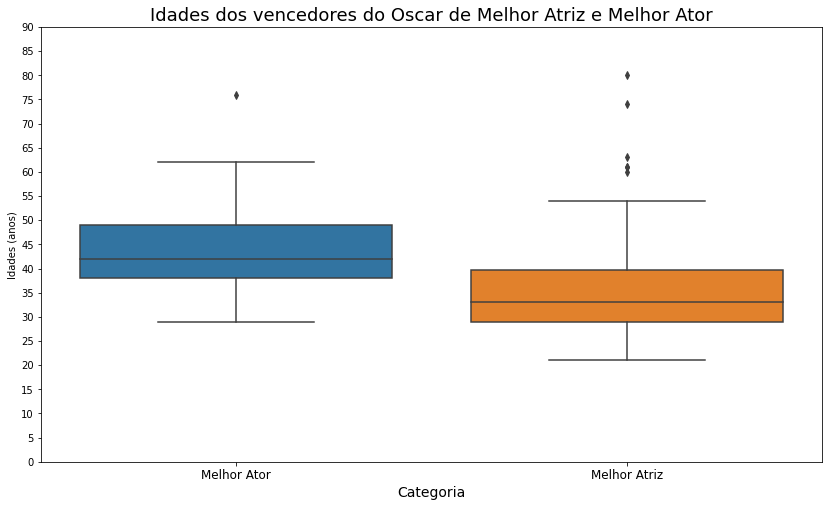

In [ ]:
ax = sns.boxplot(x = 'Categoria',y = 'Idades (anos)', data = df_concatenado)
ax.figure.set_size_inches(14,8) #tamanho da figura
ax.set_title('Idades dos vencedores do Oscar de Melhor Atriz e Melhor Ator',fontsize = 18) #configurando o título do gráfico

ax.set_xlabel('Categoria',fontsize = 14) #configurando o eixo x

ax.set_xticklabels(labels = ['Melhor Ator','Melhor Atriz'], fontsize = 12) #configurando os labels do eixo x

ax.set(ylim=(0, 90)) #configurando limite inferior e superior do eixo y

ax.set_yticks([i for i in range(0,95,5)])

ax

Os diagramas de caixa modificados sugerem que os vencedores da categoria "Melhor Ator" possuem mais idade que as vencedoras da categoria "Melhor Atriz". Portanto, aparentemente as mulheres vencem os prêmios mais cedo que os homens.

**Medidas de centro**

Calculando as medidas de centro (média e mediana) para ambos os conjuntos de dados, temos:

In [ ]:
#Calculando a média de idades para a categoria "Melhor Atriz", temos:
media = base_dados['Atrizes'].mean()
print('A média de idades das atrizes vencedoras é {} anos'.format(media))

A média de idades das atrizes vencedoras é 35.8780487804878 anos


In [ ]:
#Calculando a mediana de idades para a categoria "Melhor Atriz", temos:
mediana = base_dados['Atrizes'].median()
print('A mediana de idades das atrizes vencedoras é {} anos'.format(mediana))

A mediana de idades das atrizes vencedoras é 33.0 anos


In [ ]:
#Calculando a média de idades para a categoria "Melhor Ator", temos:
media= base_dados['Atores'].mean()
print('A média de idades dos atores vencedores é {} anos'.format(media))

A média de idades dos atores vencedores é 44.1219512195122 anos


In [ ]:
#Calculando a mediana de idades para a categoria "Melhor Ator", temos:
mediana= base_dados['Atores'].median()
print('A mediana de idades dos atores vencedores é {} anos'.format(mediana))

A mediana de idades dos atores vencedores é 42.0 anos


outra forma de calcular as estatísticas dos dados é utilizando o método ".groupby()"

In [ ]:
#Agrupando, temos:
df_agrupado = df_concatenado.groupby(by = 'Categoria')

In [ ]:
#Calculando a média:
nome_coluna = {'Idades (anos)':'Média de idades'}
nome_indices = {0:'Atores',
                1:'Atrizes'}
df_media = df_agrupado.mean()
df_media.rename(nome_coluna, axis = 'columns', inplace = True)
df_media.rename(nome_indices, axis = 'index', inplace = True)
df_media

,Média de idades
Categoria,
Atores,44.121951
Atrizes,35.878049


In [ ]:
#Calculando a mediana:
nome_coluna = {'Idades (anos)':'Mediana das idades'}
nome_indices = {0:'Atores',
                1:'Atrizes'}
df_mediana = df_agrupado.median()
df_mediana.rename(nome_coluna, axis = 'columns', inplace = True)
df_mediana.rename(nome_indices, axis = 'index', inplace = True)
df_mediana

,Mediana das idades
Categoria,
Atores,42.0
Atrizes,33.0


In [ ]:
#concatenando ambos os dataframes, temos:
df_stats_concatenado = pd.concat([df_mediana,df_media], axis = 'columns')
df_stats_concatenado

,Mediana das idades,Média de idades
Categoria,,
Atores,42.0,44.121951
Atrizes,33.0,35.878049


A partir das medidas de centro obtidas acima, aparentemente os atores vencedores possuem mais idade que as Atrizes vencedoras, o que pode indicar uma influência do sexo na premiação.

## Conjunto de Dados 19: Pesos e Volumes de Refrigerantes

**Contexto dos dados**

O conjunto de dados apresenta pesos e volumes de refrigerantes da marca Coca-Cola e Pepsi para refrigerantes normais e dietéticos. O peso está em libras e o volume em onças.


In [ ]:
#Abrindo a base de dados, temos:
base_dados = pd.read_csv('COLA.csv')
base_dados.head()

,CKREGWT,CKREGVOL,CKDIETWT,CKDTVOL,PPREGWT,PPREGVOL,PPDIETWT,PPDTVOL
0,0.8192,12.3,0.7773,12.1,0.8258,12.4,0.7925,12.3
1,0.8150,12.1,0.7758,12.1,0.8156,12.2,0.7868,12.2
2,0.8163,12.2,0.7896,12.3,0.8211,12.2,0.7846,12.2
3,0.8211,12.3,0.7868,12.3,0.8170,12.2,0.7938,12.3
4,0.8181,12.2,0.7844,12.2,0.8216,12.2,0.7861,12.2


In [ ]:
#Renomeando as colunas, temos:
nomes_colunas = {'CKREGWT':'Peso Coca Normal',
                 'CKREGVOL':'Volume Coca Normal',
                 'CKDIETWT':'Peso Coca Dietética',
                 'CKDTVOL':'Volume Coca Dietética',
                 'PPREGWT':'Peso Pepsi Normal',
                 'PPREGVOL':'Volume Pepsi Normal',
                 'PPDIETWT':'Peso Pepsi Dietética',
                 'PPDTVOL':'Volume Pepsi Dietética'}
base_dados.rename(nomes_colunas, axis = 'columns', inplace = True)
base_dados.head(10)

,Peso Coca Normal,Volume Coca Normal,Peso Coca Dietética,Volume Coca Dietética,Peso Pepsi Normal,Volume Pepsi Normal,Peso Pepsi Dietética,Volume Pepsi Dietética
0,0.8192,12.3,0.7773,12.1,0.8258,12.4,0.7925,12.3
1,0.8150,12.1,0.7758,12.1,0.8156,12.2,0.7868,12.2
2,0.8163,12.2,0.7896,12.3,0.8211,12.2,0.7846,12.2
3,0.8211,12.3,0.7868,12.3,0.8170,12.2,0.7938,12.3
4,0.8181,12.2,0.7844,12.2,0.8216,12.2,0.7861,12.2
5,0.8247,12.3,0.7861,12.3,0.8302,12.4,0.7844,12.2
6,0.8062,12.0,0.7806,12.2,0.8192,12.2,0.7795,12.2
7,0.8128,12.1,0.7830,12.2,0.8192,12.2,0.7883,12.3
8,0.8172,12.2,0.7852,12.2,0.8271,12.3,0.7879,12.2
9,0.8110,12.1,0.7879,12.3,0.8251,12.3,0.7850,12.3


**Problema -** Há diferenças entre os pesos de Coca-Cola normal e Coca-Cola dietética? 

Para investigar se há diferenças entre os pesos de Coca-Cola regular e Coca-Cola dietética devemos utilizar diagramas de caixa modificada para comparar a dispersão dos dados para ambos os conjuntos de valores. Os diagramas de caixa são úteis para comparação de dados de diferentes conjuntos de valores, no presente problema queremos comparar pesos de duas populações distitntas: refrigerantes de Coca-Cola regular e refrigerantes de Coca-Cola dietética.

Determinando os valores máximos e mínimos de cada conjunto de valores para definição das escalas do diagrama de caixas modificado, temos:

In [ ]:
#Valor máximo e mínimo da variável 'Peso Coca Normal', temos:
base_dados['Peso Coca Normal'].min()

0.7901

In [ ]:
base_dados['Peso Coca Normal'].max()

0.8295

In [ ]:
#Valor máximo e mínimo da variável 'Peso Coca Dietética', temos:
base_dados['Peso Coca Dietética'].min()

0.7758

In [ ]:
base_dados['Peso Coca Dietética'].max()

0.7923

Também podemos apresentar as estatísticas dos conjuntos de dados através do método ".describe()"

In [ ]:
base_dados[['Peso Coca Normal','Peso Coca Dietética']].describe()

,Peso Coca Normal,Peso Coca Dietética
count,36.000000,36.000000
mean,0.816822,0.784794
std,0.007507,0.004391
min,0.790100,0.775800
25%,0.814825,0.782200
50%,0.817100,0.785200
75%,0.820800,0.787900
max,0.829500,0.792300


Os dados estatísticos exibidos acima, sugerem que o peso de Coca Normal é superior ao peso de Coca Dietética. A média de peso da Coca Normal é 0.816 lb, enquanto a média de peso da Coca Dietética é 0.784 lb. Além disso, os valores de quartis e mediana também são superiores aos calculados para o peso de Coca Dietética.

Construindo os diagramas de caixa modificados, temos:

Primeiramente vamos construir um novo dataframe de modo a termos os dados de pesos em uma única coluna e uma segunda coluna armazenando a categoria do dado (se pertence à Coca normal ou à Coca dietética)

In [ ]:
#Criando novo dataframe pra armazenar somente os valores de Peso de Coca normal, juntamente com a categoria:
df_coca_normal = pd.DataFrame({'Peso Coca':base_dados['Peso Coca Normal']})
categoria = []
for i in df_coca_normal.index:
  categoria.append(int(0))
df_coca_normal['Categoria'] = categoria
df_coca_normal.head()

,Peso Coca,Categoria
0,0.8192,0
1,0.8150,0
2,0.8163,0
3,0.8211,0
4,0.8181,0


In [ ]:
#Criando novo dataframe pra armazenar somente os valores de Peso de Coca Dietética, juntamente com a categoria:
df_coca_dietetica = pd.DataFrame({'Peso Coca':base_dados['Peso Coca Dietética']})
categoria = []
for i in df_coca_dietetica.index:
  categoria.append(int(1))
df_coca_dietetica['Categoria'] = categoria
df_coca_dietetica.head()

,Peso Coca,Categoria
0,0.7773,1
1,0.7758,1
2,0.7896,1
3,0.7868,1
4,0.7844,1


In [ ]:
#Concatenando os dados, temos:
df_concatenado_coca = pd.concat([df_coca_normal, df_coca_dietetica], axis = 'index')
df_concatenado_coca.reset_index(inplace = True)
df_concatenado_coca.drop('index', axis = 'columns', inplace = True)
df_concatenado_coca

,Peso Coca,Categoria
0,0.8192,0
1,0.8150,0
2,0.8163,0
3,0.8211,0
4,0.8181,0
...,...,...
67,0.7910,1
68,0.7879,1
69,0.7923,1
70,0.7859,1


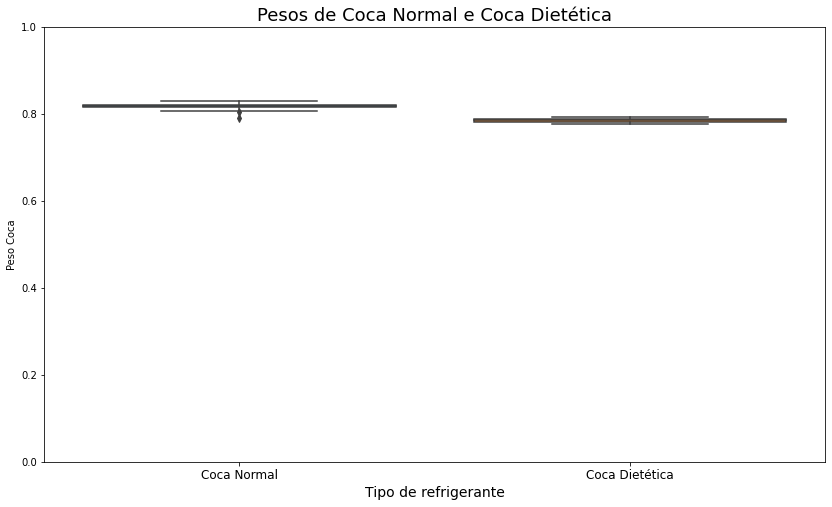

In [ ]:
#Criando o diagrama de caixa modificado, temos:
ax = sns.boxplot(x = 'Categoria',y = 'Peso Coca', data = df_concatenado_coca)
ax.figure.set_size_inches(14,8) #tamanho da figura
ax.set_title('Pesos de Coca Normal e Coca Dietética',fontsize = 18) #configurando o título do gráfico

ax.set_xlabel('Tipo de refrigerante',fontsize = 14) #configurando o eixo x

ax.set_xticklabels(labels = ['Coca Normal','Coca Dietética'], fontsize = 12) #configurando os labels do eixo x

ax.set(ylim=(0, 1)) #configurando limite inferior e superior do eixo y

#ax.set_yticks([i for i in range(0,95,5)])

ax

Analisando o diagrama de caixas acima apresentado, podemos verificar que, em termos práticos, a diferença de pesos entre os dois tipos de refrigerantes é pequena. Observe que começamos a escala a partir de zero pra ter uma noção melhor das diferenças entre os dois conjuntos de dados.

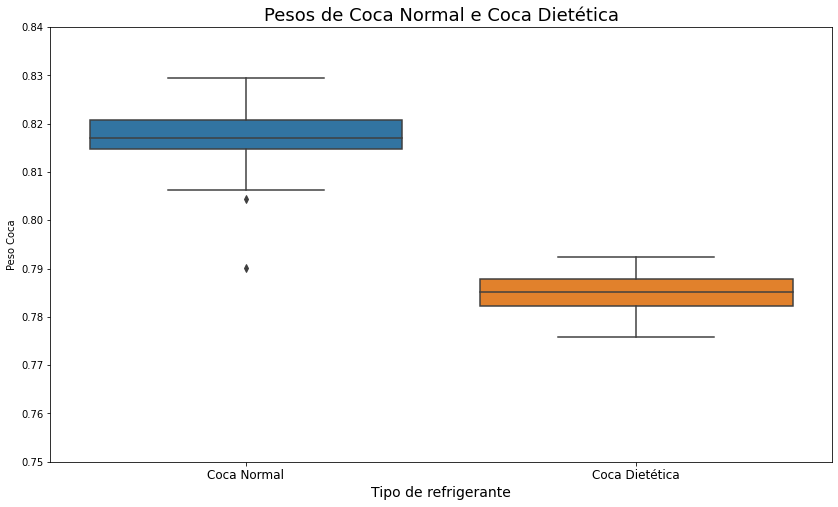

In [ ]:
#Criando o diagrama de caixa modificado, temos:
ax = sns.boxplot(x = 'Categoria',y = 'Peso Coca', data = df_concatenado_coca)
ax.figure.set_size_inches(14,8) #tamanho da figura
ax.set_title('Pesos de Coca Normal e Coca Dietética',fontsize = 18) #configurando o título do gráfico

ax.set_xlabel('Tipo de refrigerante',fontsize = 14) #configurando o eixo x

ax.set_xticklabels(labels = ['Coca Normal','Coca Dietética'], fontsize = 12) #configurando os labels do eixo x

ax.set(ylim=(0.75, 0.84)) #configurando limite inferior e superior do eixo y

#ax.set_yticks([i for i in range(0,95,5)])

ax

Os diagramas de caixa, em uma escala de 0.75 a 0.84 lb, mostram que os pesos de Coca Normal são superiores aos pesos do refrigerante de Coca do tipo dietético.

## Referências bibliográficas:

1.   TRIOLA, Mario F.. Resumos e Gráficos de Dados: distribuições de frequência. In: TRIOLA, Mario F. (ed.). Introdução à Estatística. 12. ed. Rio de Janeiro: Ltc, 2017. Cap. 2. p. 64-72.


